In [1]:
import sys
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.special import rel_entr
from scipy.spatial.distance import correlation
import scipy.stats as stats
import dcor
from sklearn.feature_selection import mutual_info_classif

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
molm13_scDNA = pd.read_csv('scDNA_unified_cnv_historicalRNA.csv', sep = '\t')
molm13_scRNA = pd.read_csv('scRNA_unified_cnv_historicalRNA.csv', sep = '\t')

In [3]:
molm13_scDNA.columns = ['chr', 'start', 'end'] + ['P'+str(i) for i in range(10)] + ['R'+str(i) for i in range(10)]
molm13_scDNA

,chr,start,end,P0,P1,P2,P3,P4,P5,P6,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
0,1,0,1961490,5.215083,6.548495,5.737780,6.279990,5.109332,5.987468,5.151611,...,7.029594,5.175063,6.699403,6.629199,6.907684,5.637318,5.886763,6.161124,5.919838,5.791947
1,1,1961490,3112414,1.758613,2.304460,2.232932,2.364633,1.755256,2.099053,1.821980,...,2.580546,2.284823,2.273319,1.984278,2.041801,2.601521,1.773227,2.293727,2.300774,2.396339
2,1,3112414,4144471,1.531879,2.514043,2.367236,2.478586,1.629569,1.969837,1.375625,...,2.788497,2.106616,2.930343,2.070977,2.377998,2.434390,2.627883,1.784396,2.343976,2.519090
3,1,4144471,5178170,1.950770,2.640710,2.520785,2.800172,1.924373,2.154493,1.477994,...,3.046154,2.714102,2.517267,2.588060,2.876385,2.830442,2.292699,2.506319,2.953040,2.105310
4,1,5178170,6203380,1.860140,2.829364,2.601277,2.606276,1.865325,1.975259,1.513660,...,3.136115,2.198919,2.449925,1.876526,2.888914,2.311987,2.427317,2.229981,2.372766,2.861030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,23,14727415,15838677,1.015888,1.100877,1.111730,1.148311,1.040521,1.331465,1.229132,...,1.261709,1.108338,0.730037,1.252810,1.270631,0.868857,1.502502,1.212797,0.680615,0.397147
2622,23,15838677,17180431,1.489107,1.238176,1.635844,1.525518,1.520007,1.478242,1.715918,...,1.782902,1.587705,0.900324,1.260853,1.699188,1.356329,1.891441,1.458252,0.941089,1.719252
2623,23,17180431,19651014,2.625915,2.066200,3.117993,3.103738,3.095263,3.075477,3.363689,...,3.291404,3.057103,1.507908,3.883587,3.401728,2.323611,3.159129,3.370640,2.744678,3.316020
2624,23,19651014,21003176,1.207251,1.301986,1.128721,1.211872,1.238637,1.288010,1.152316,...,1.307131,0.969034,0.754339,1.078585,1.504283,1.130121,1.619078,1.413242,1.230456,1.465735


In [4]:
molm13_scRNA.columns = ['chr', 'start', 'end'] + ['P'+str(i) for i in range(10)] + ['R'+str(i) for i in range(10)]
molm13_scRNA

,chr,start,end,P0,P1,P2,P3,P4,P5,P6,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
0,1,0,1961490,0.006667,-0.136151,-0.078388,-0.160145,-0.132745,-0.272127,-0.234247,...,-0.078158,0.053304,-0.288218,-0.164332,-0.049104,0.063174,-0.064665,-0.026946,0.028982,0.071887
1,1,1961490,3112414,0.006667,-0.136151,-0.078388,-0.160145,-0.132745,-0.272127,-0.234247,...,-0.078158,0.053304,-0.288218,-0.164332,-0.049104,0.063174,-0.064665,-0.026946,0.028982,0.071887
2,1,3112414,4144471,-0.062694,-0.083988,-0.080924,-0.146064,-0.052103,-0.173248,-0.174351,...,-0.048053,0.033940,-0.195211,-0.113585,0.015762,0.103535,-0.016560,0.005184,-0.012505,0.021134
3,1,4144471,5178170,-0.132054,-0.031824,-0.083459,-0.131982,0.028539,-0.074370,-0.114454,...,-0.017947,0.014577,-0.102204,-0.062839,0.080628,0.143895,0.031545,0.037313,-0.053992,-0.029618
4,1,5178170,6203380,-0.132054,-0.031824,-0.083459,-0.131982,0.028539,-0.074370,-0.114454,...,-0.017947,0.014577,-0.102204,-0.062839,0.080628,0.143895,0.031545,0.037313,-0.053992,-0.029618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,23,14727415,15838677,-0.076767,-0.023849,0.036405,0.005464,0.045449,0.043509,0.045914,...,-0.061148,0.033531,-0.044000,-0.053109,0.025718,-0.115223,-0.192699,-0.096182,-0.090886,-0.078559
2622,23,15838677,17180431,-0.076767,-0.023849,0.036405,0.005464,0.045449,0.043509,0.045914,...,-0.061148,0.033531,-0.044000,-0.053109,0.025718,-0.115223,-0.192699,-0.096182,-0.090886,-0.078559
2623,23,17180431,19651014,-0.076767,-0.023849,0.036405,0.005464,0.045449,0.043509,0.045914,...,-0.061148,0.033531,-0.044000,-0.053109,0.025718,-0.115223,-0.192699,-0.096182,-0.090886,-0.078559
2624,23,19651014,21003176,-0.076767,-0.023849,0.036405,0.005464,0.045449,0.043509,0.045914,...,-0.061148,0.033531,-0.044000,-0.053109,0.025718,-0.115223,-0.192699,-0.096182,-0.090886,-0.078559


In [5]:
def cross_correlation(data_1, data_2, correlation_method='pearson'):

    data = np.column_stack((data_1, data_2))
    data = pd.DataFrame(data)

    if correlation_method in ['pearson', 'kendall', 'spearman']:
        cross_corr_val = data.corr(method=correlation_method).iloc[0, 1]

    elif correlation_method == 'distance':
        cross_corr_val = dcor.distance_correlation(data.iloc[:, 0], data.iloc[:, 1])
        # Usual (biased) estimator for the distance correlation.

    elif correlation_method == 'mutual_information':
        # implementation as in Fiedor et al. 2014
        quantile_buckets = pd.qcut(data.values.reshape(-1), q=4, labels=False).reshape(-1, 2)
        cross_corr_val = mutual_info_classif(quantile_buckets[:, [0]], quantile_buckets[:, 1], discrete_features=True)[0]

    elif correlation_method == 'squared_pearson':
        cross_corr_val = (data ** 2).corr(method='pearson').iloc[0, 1]

    else:
        raise NotImplementedError('correlation method not implemented')

    return cross_corr_val


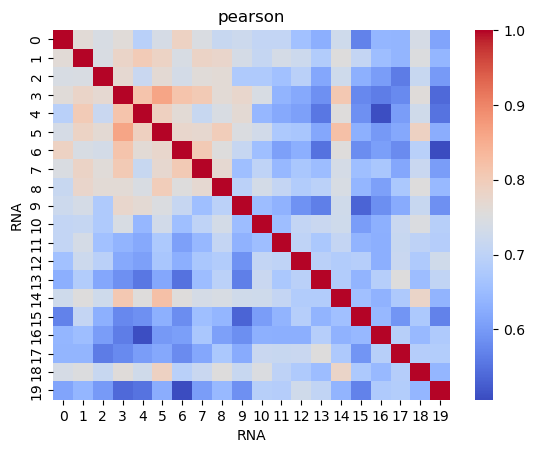

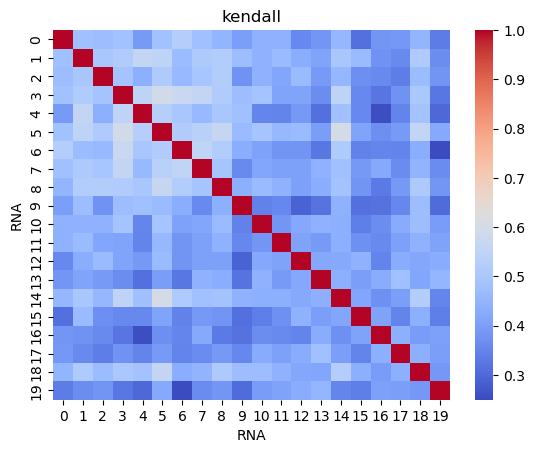

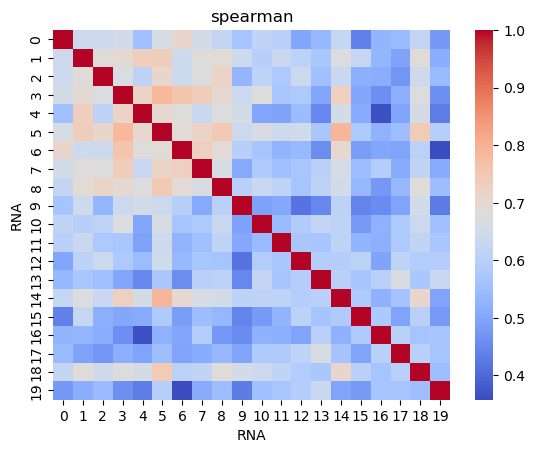

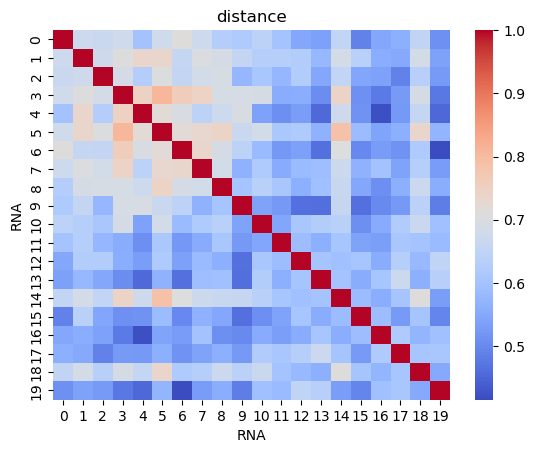

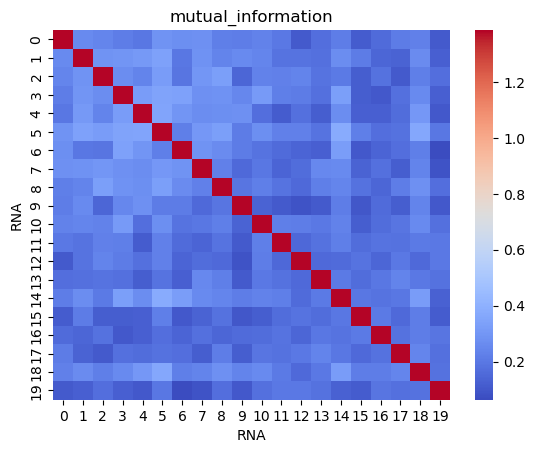

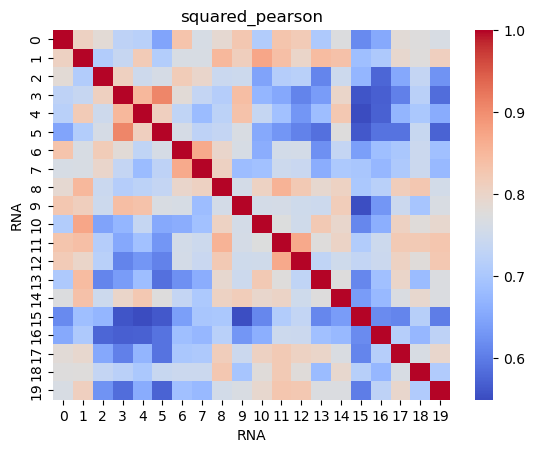

In [6]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    RNA_distance= np.array([[cross_correlation(molm13_scRNA.iloc[:, 3+c], molm13_scRNA.iloc[:, 3+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(RNA_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('RNA')
    plt.ylabel('RNA')
    plt.title(method)

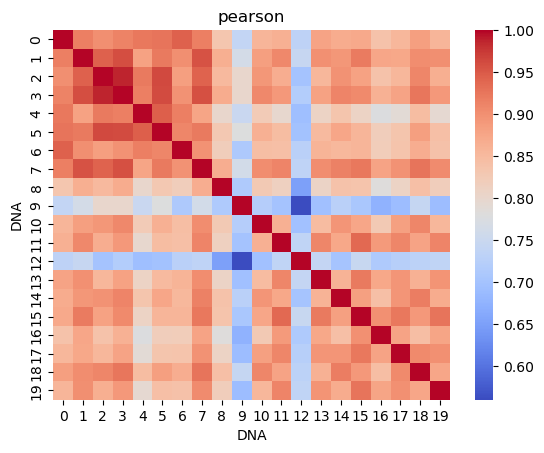

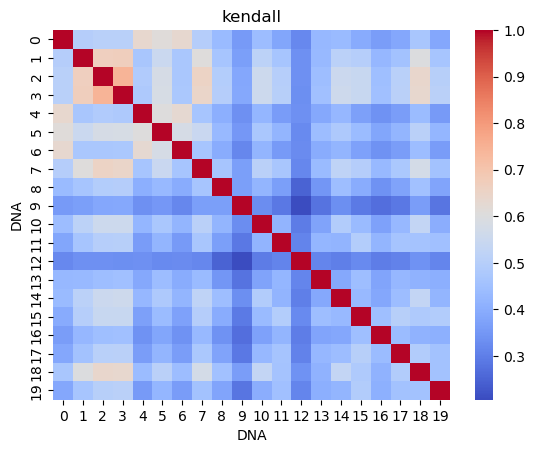

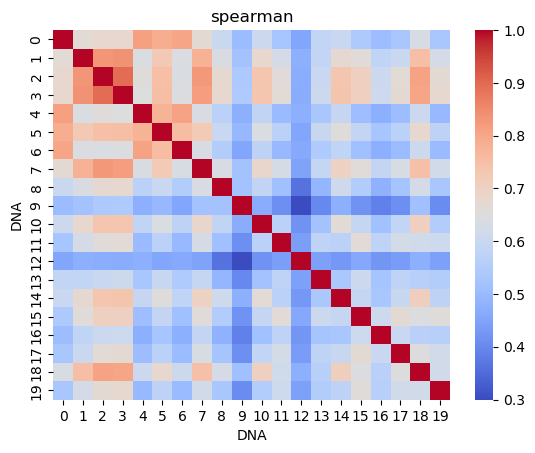

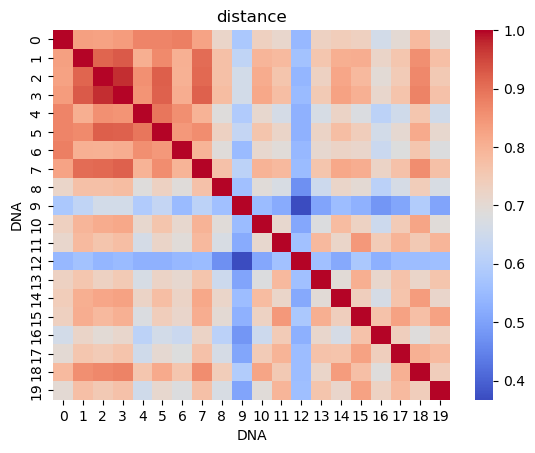

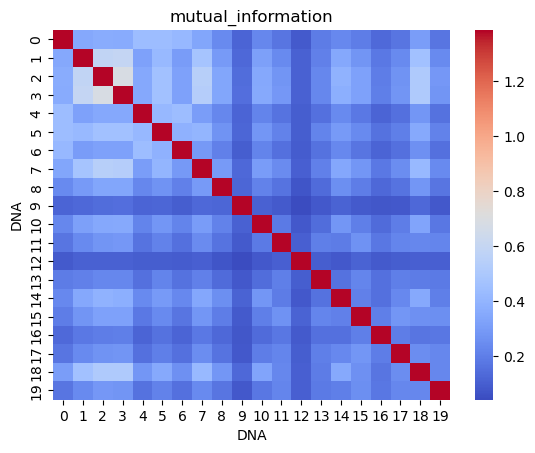

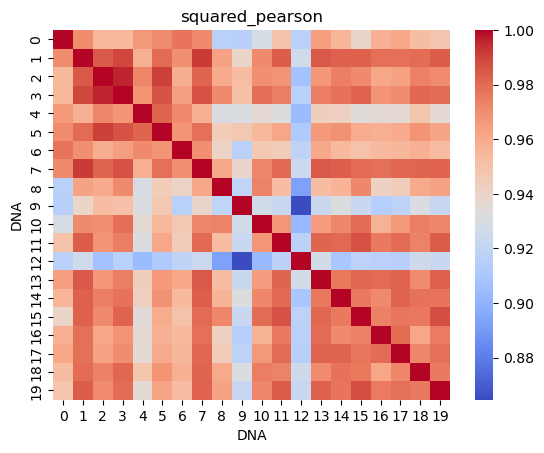

In [7]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DNA_distance= np.array([[cross_correlation(molm13_scDNA.iloc[:, 3+c], molm13_scDNA.iloc[:, 3+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DNA_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('DNA')
    plt.title(method)

In [8]:
log_scDNA = np.log(molm13_scDNA+1)
log_scDNA

,chr,start,end,P0,P1,P2,P3,P4,P5,P6,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
0,0.693147,0.000000,14.489215,1.826979,2.021348,1.907730,1.985129,1.809817,1.944118,1.816714,...,2.083134,1.820519,2.041143,2.031983,2.067835,1.892708,1.929601,1.968667,1.934392,1.915738
1,0.693147,14.489215,14.950910,1.014728,1.195273,1.173389,1.213319,1.013510,1.131097,1.037439,...,1.275515,1.189313,1.185805,1.093358,1.112450,1.281356,1.020012,1.192020,1.194157,1.222698
2,0.693147,14.950910,15.237286,0.928962,1.256767,1.214092,1.246626,0.966820,1.088507,0.865260,...,1.331969,1.133534,1.368727,1.121996,1.217283,1.233839,1.288649,1.024031,1.207160,1.258202
3,0.693147,15.237286,15.459962,1.082066,1.292179,1.258684,1.335046,1.073080,1.148828,0.907449,...,1.397767,1.312137,1.257684,1.277612,1.354903,1.342980,1.191708,1.254567,1.374485,1.133114
4,0.693147,15.459962,15.640605,1.050871,1.342699,1.281289,1.282676,1.052682,1.090331,0.921740,...,1.419757,1.162813,1.238352,1.056583,1.358130,1.197548,1.231778,1.172476,1.215733,1.350934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,3.178054,16.505221,16.577965,0.701060,0.742355,0.747508,0.764682,0.713205,0.846497,0.801612,...,0.816121,0.745900,0.548143,0.812178,0.820058,0.625327,0.917291,0.794257,0.519160,0.334432
2622,3.178054,16.577965,16.659282,0.911924,0.805661,0.969203,0.926446,0.924262,0.907549,0.999130,...,1.023494,0.950771,0.642024,0.815742,0.992951,0.857105,1.061755,0.899451,0.663249,1.000357
2623,3.178054,16.659282,16.793640,1.288107,1.120439,1.415366,1.411898,1.409831,1.404988,1.473318,...,1.456614,1.400469,0.919449,1.585880,1.481997,1.201052,1.425306,1.474909,1.320336,1.462334
2624,3.178054,16.793640,16.860184,0.791748,0.833772,0.755521,0.793839,0.805867,0.827683,0.766545,...,0.836005,0.677543,0.562092,0.731687,0.918002,0.756179,0.962822,0.880971,0.802206,0.902490


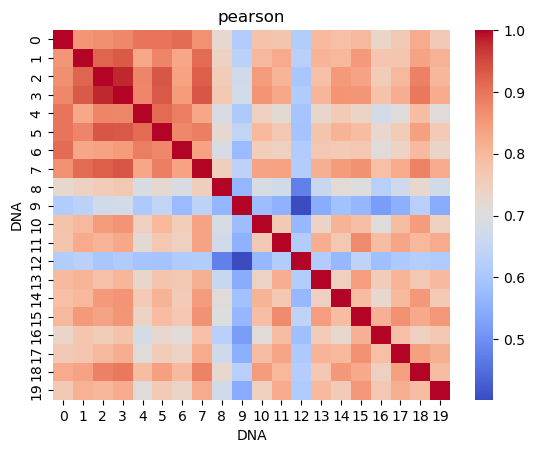

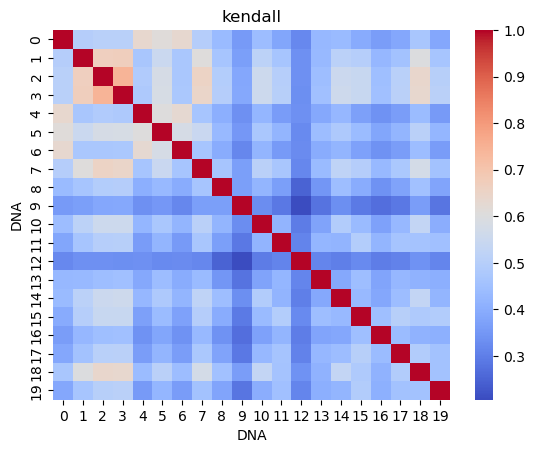

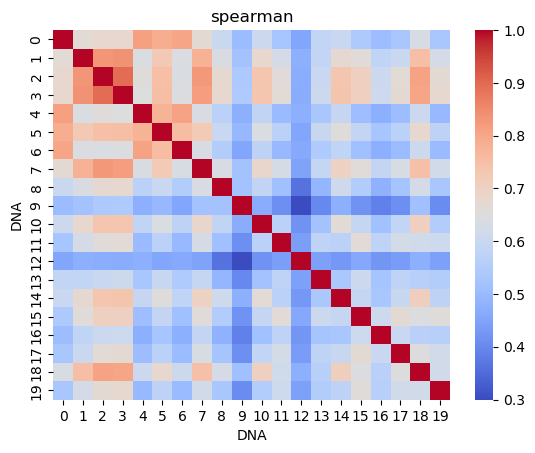

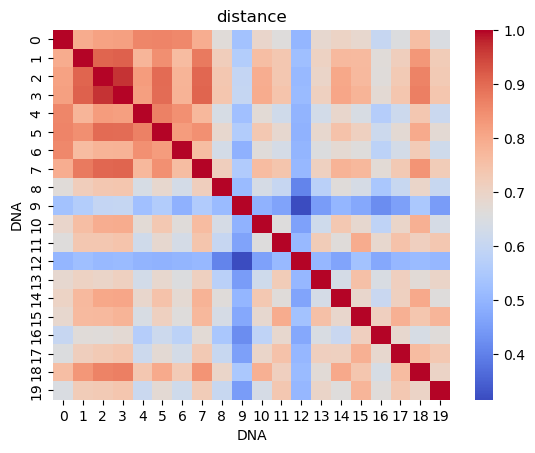

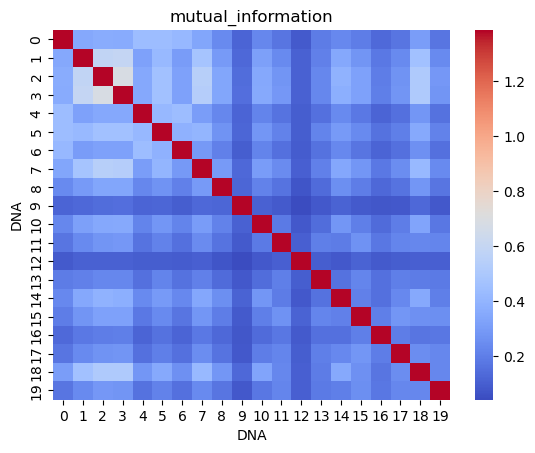

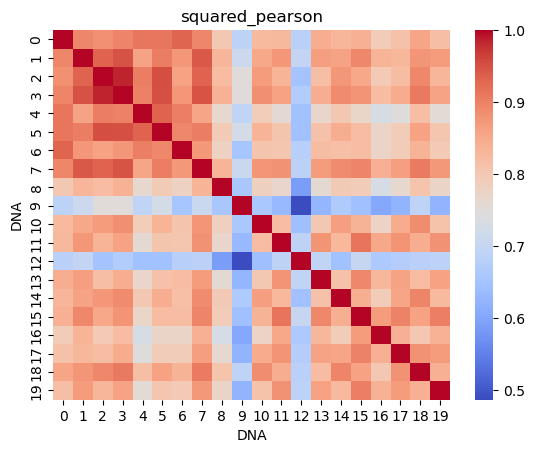

In [9]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DNA_distance= np.array([[cross_correlation(log_scDNA.iloc[:, 3+c], log_scDNA.iloc[:, 3+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DNA_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('DNA')
    plt.title(method)

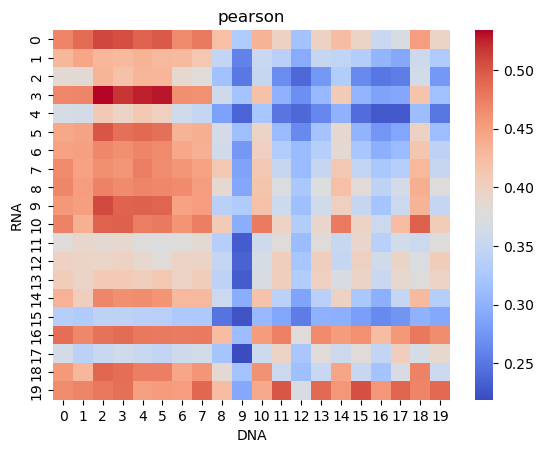

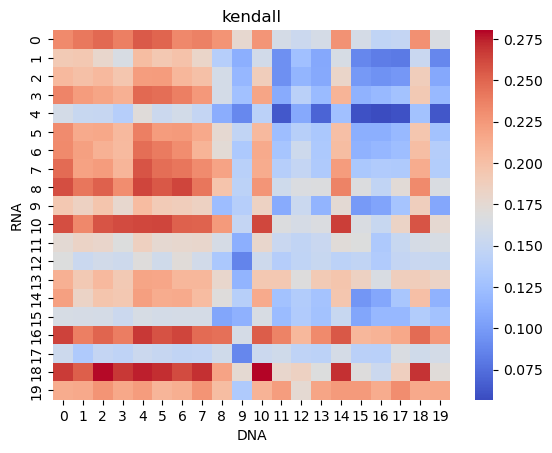

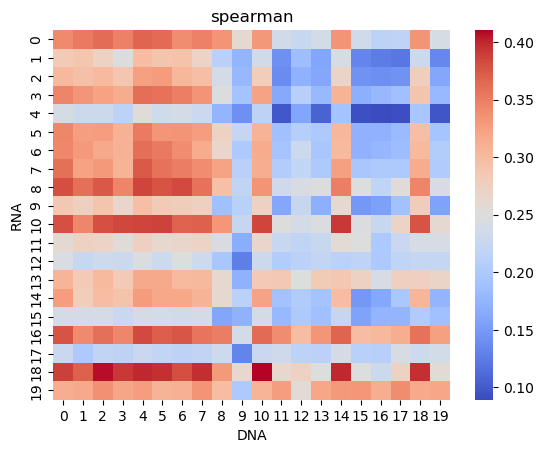

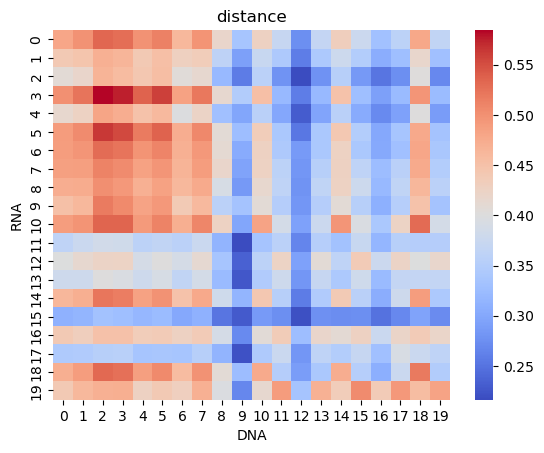

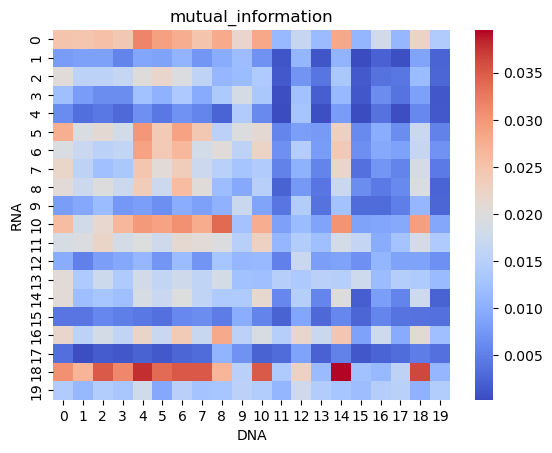

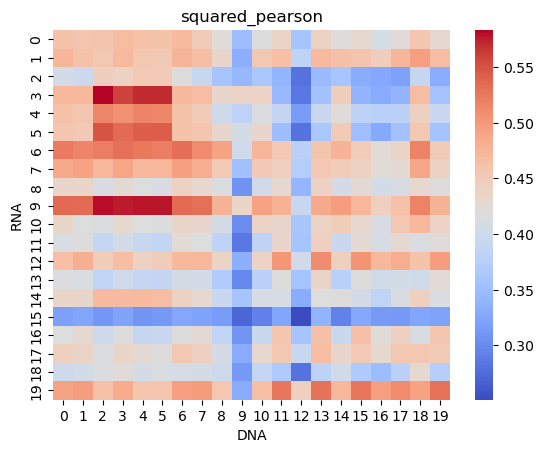

In [10]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(log_scDNA.iloc[:, 3+c], molm13_scRNA.iloc[:, 3+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)

In [11]:
larger_df = pd.concat([log_scDNA.iloc[:, 3:], molm13_scRNA.iloc[:, 3:]], axis = 1)
larger_df = larger_df.apply(lambda x: (x - np.nanmean(x)) / (np.nanstd(x)), axis=0)
print(np.nanmean(larger_df, axis = 0))
print(np.nanstd(larger_df, axis = 0))

[ 2.70579869e-16 -9.74087528e-17 -1.08231948e-17 -2.81403064e-16
 -1.51524727e-16 -5.84452517e-16  2.81403064e-16 -4.22104596e-16
  5.19513348e-16  2.70579869e-16 -1.08231948e-16  9.74087528e-16
 -8.65855581e-17 -1.56936324e-16 -1.08231948e-16  6.27745296e-16
 -6.71038075e-16 -1.83994311e-16  7.46800438e-16 -7.73858425e-16
  1.08231948e-17  4.32927790e-17 -1.08231948e-17  8.65855581e-17
 -6.49391685e-17 -2.16463895e-17  0.00000000e+00  4.32927790e-17
 -1.08231948e-17  0.00000000e+00  0.00000000e+00  2.16463895e-17
  1.08231948e-17 -7.03507659e-17 -2.16463895e-17  0.00000000e+00
 -5.41159738e-17 -2.16463895e-17 -2.16463895e-17  4.32927790e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


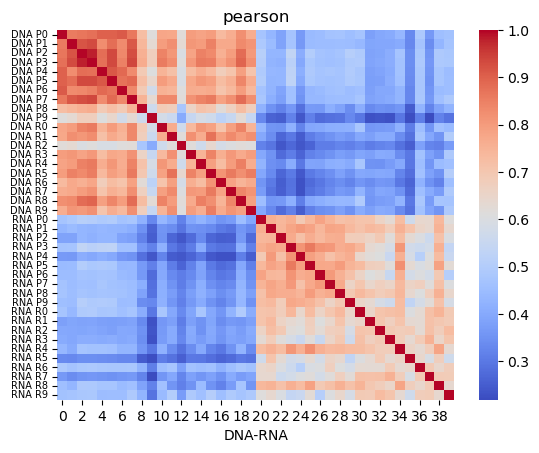

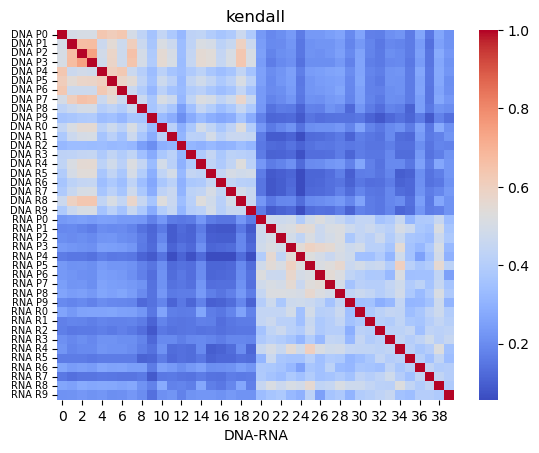

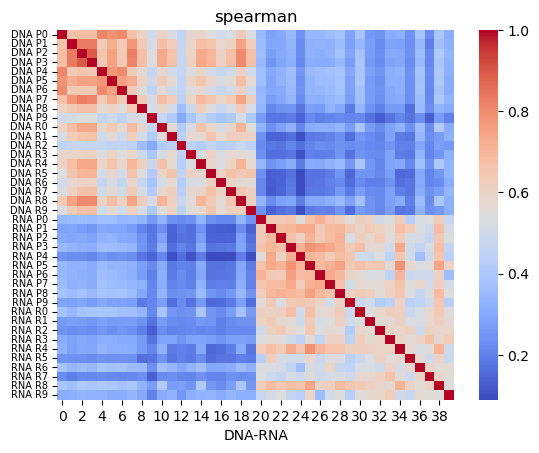

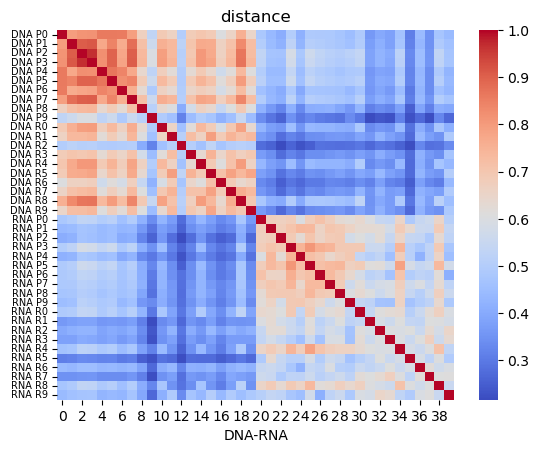

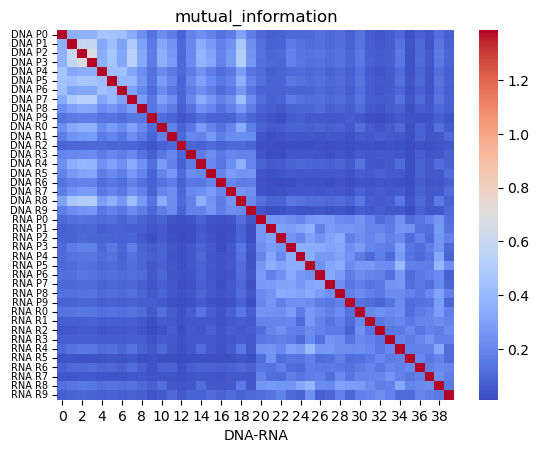

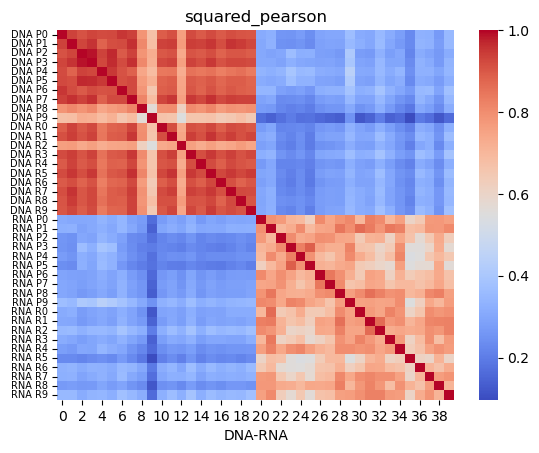

In [12]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(larger_df.iloc[:, c], larger_df.iloc[:, r], method) for c in range(40)] for r in range(40)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.yticks(ticks = np.linspace(0.5, 39.5, 40), labels = ['DNA P' + str(para) for para in range(10)] + ['DNA R' + str(para) for para in range(10)]+['RNA P' + str(para) for para in range(10)] + ['RNA R' + str(para) for para in range(10)], rotation = 'horizontal', size = 7)
    plt.xlabel('DNA-RNA')
    plt.ylabel('')
    plt.title(method)

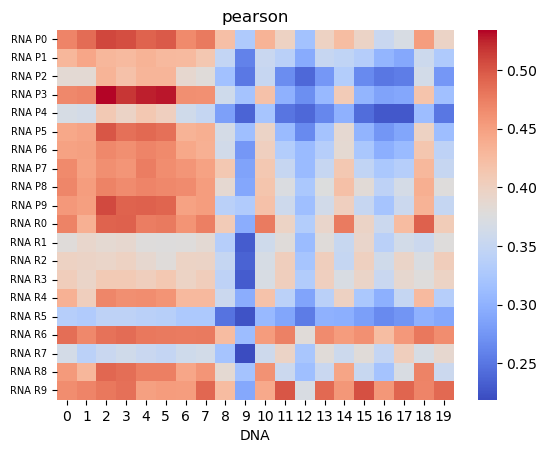

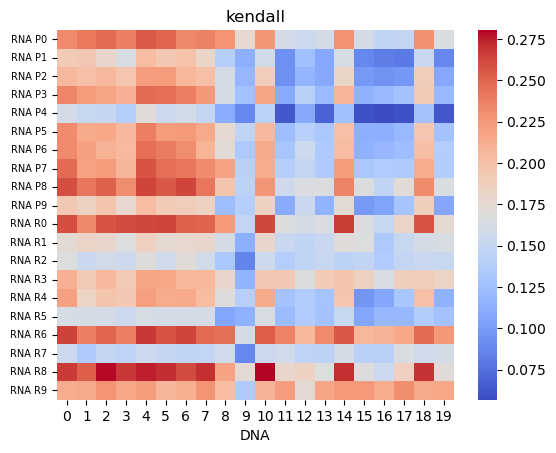

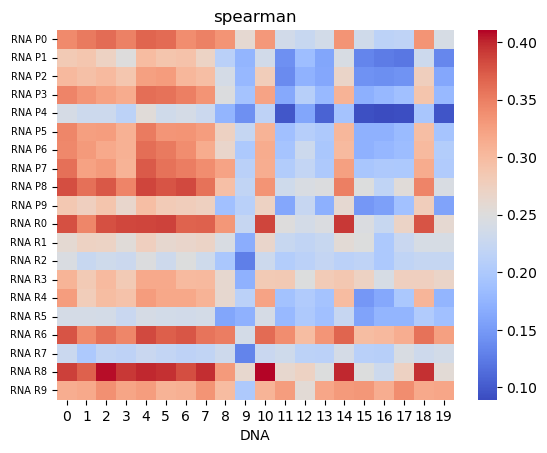

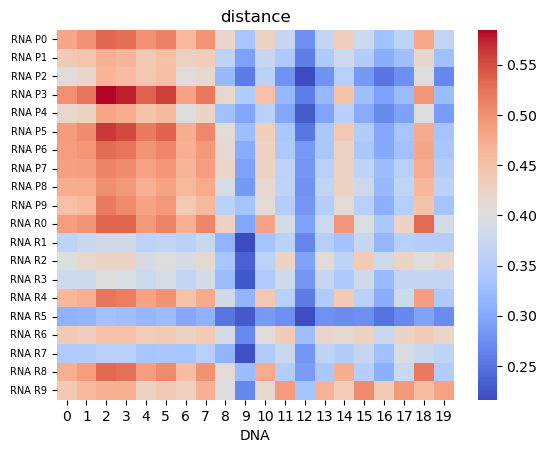

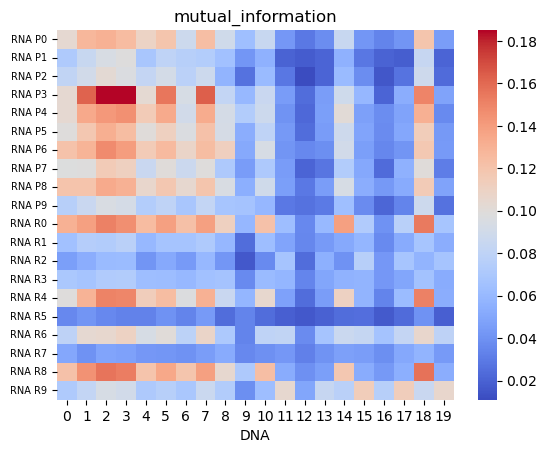

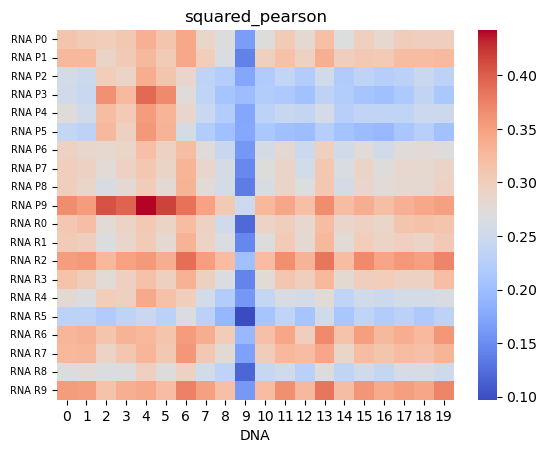

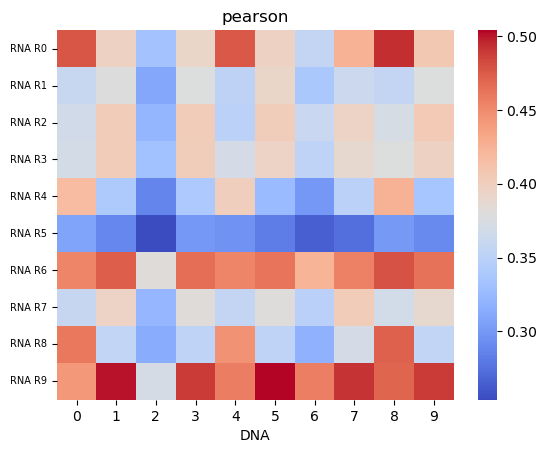

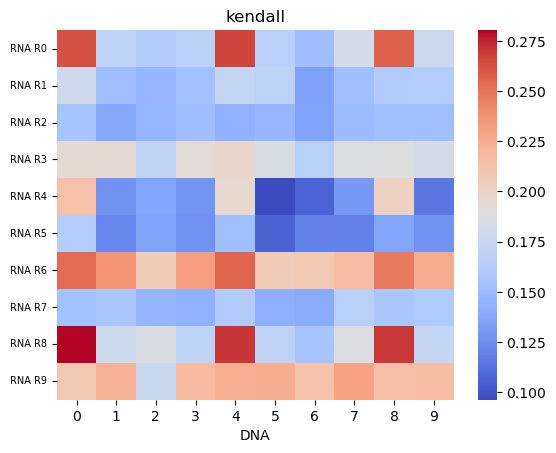

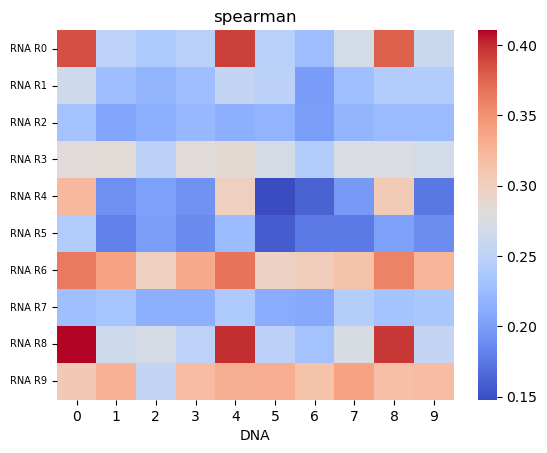

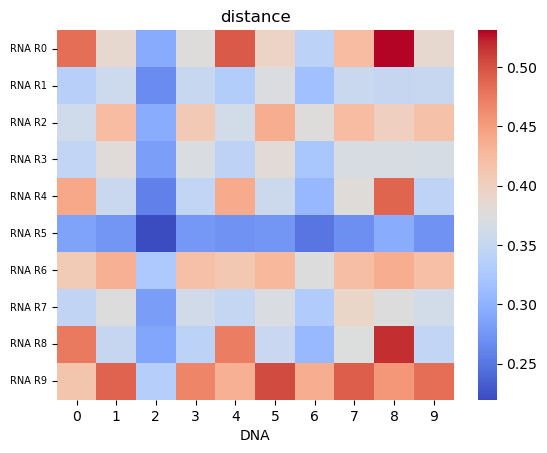

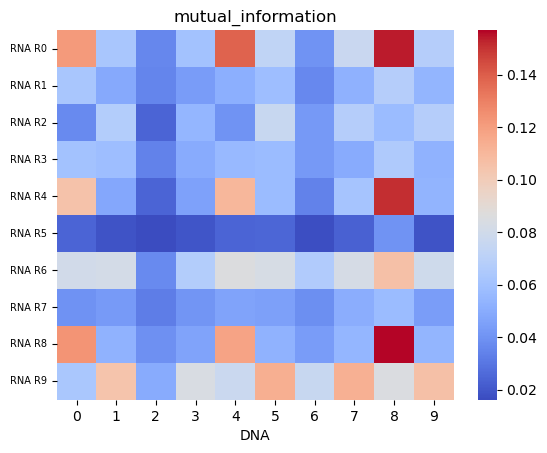

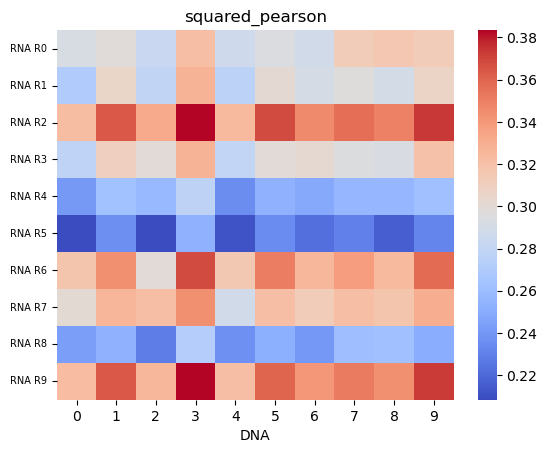

In [13]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(larger_df.iloc[:, c], larger_df.iloc[:, 20+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.yticks(ticks = np.linspace(0.5, 19.5, 20), labels = ['RNA P' + str(para) for para in range(10)] + ['RNA R' + str(para) for para in range(10)], rotation = 'horizontal', size = 7)
    plt.xlabel('DNA')
    plt.ylabel('')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(larger_df.iloc[:, 10+c], larger_df.iloc[:, 30+r], method) for c in range(10)] for r in range(10)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.yticks(ticks = np.linspace(0.5, 9.5, 10), labels = ['RNA R' + str(para) for para in range(10)], rotation = 'horizontal', size = 7)
    plt.xlabel('DNA')
    plt.ylabel('')
    plt.title(method)

Text(0.5, 1.0, 'DNA')

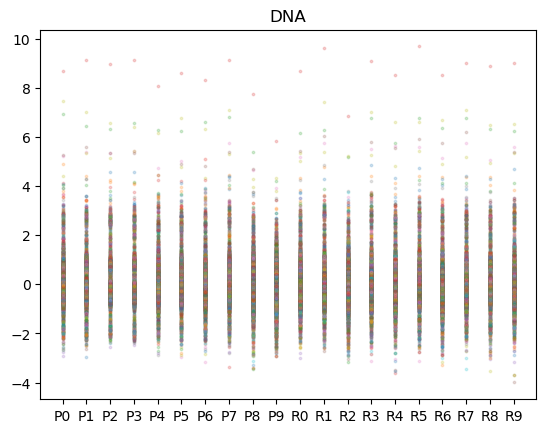

In [14]:
for i in range(larger_df.shape[0]):
    plt.scatter(['P'+str(i) for i in range(10)] + ['R'+str(i) for i in range(10)], larger_df.iloc[i, :20], alpha = 0.2, s= 3)
plt.title('DNA')

Text(0.5, 1.0, 'RNA')

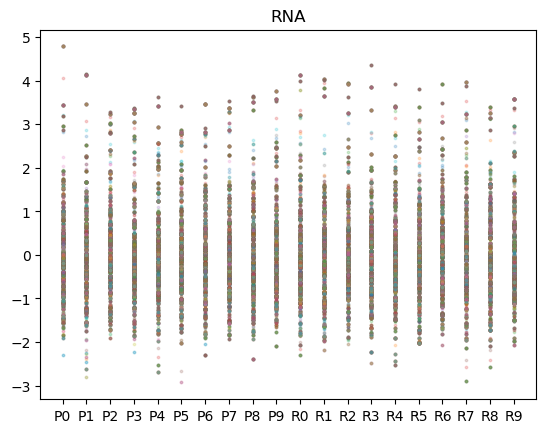

In [15]:
for i in range(larger_df.shape[0]):
    plt.scatter(['P'+str(i) for i in range(10)] + ['R'+str(i) for i in range(10)], larger_df.iloc[i, 20:], alpha = 0.2,  s= 3)
plt.title('RNA')

In [16]:
P_DNA = np.nanmean(larger_df.iloc[:, :10], axis = 1)
R_DNA = np.nanmean(larger_df.iloc[:, 10:20], axis = 1)
P_RNA = np.nanmean(larger_df.iloc[:, 20:30], axis = 1)
R_RNA = np.nanmean(larger_df.iloc[:, 30:], axis = 1)

Text(0.5, 1.0, 'Histogram of fold-change')

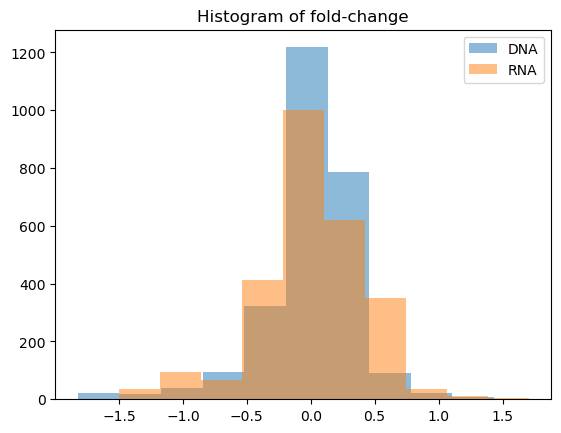

In [17]:
fold_DNA = R_DNA - P_DNA
fold_RNA = R_RNA - P_RNA
plt.hist(fold_DNA, alpha = 0.5, label = 'DNA')
plt.hist(fold_RNA, alpha = 0.5, label = 'RNA')
plt.legend()
plt.title('Histogram of fold-change')

Text(0.5, 1.0, 'Histogram of p-value')

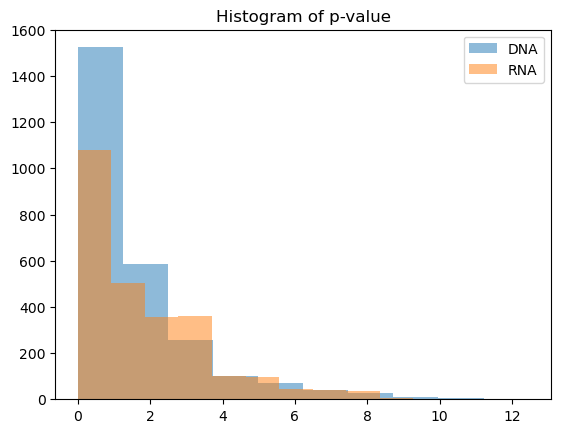

In [18]:
pvalue_DNA = [stats.ttest_ind(larger_df.iloc[gene_idx, :10], larger_df.iloc[gene_idx, 10:20])[1] for gene_idx in range(larger_df.shape[0])]
pvalue_RNA = [stats.ttest_ind(larger_df.iloc[gene_idx, 20:30], larger_df.iloc[gene_idx, 30:])[1] for gene_idx in range(larger_df.shape[0])]
plt.hist(-np.log(pvalue_DNA), alpha = 0.5, label = 'DNA')
plt.hist(-np.log(pvalue_RNA), alpha = 0.5, label = 'RNA')
plt.legend()
plt.title('Histogram of p-value')

In [19]:
geneloc = molm13_scDNA.iloc[:, :3]
geneloc['pDNA'] = pvalue_DNA
geneloc['pRNA'] = pvalue_RNA
geneloc['combinedP'] = 1 - stats.chi2.cdf(-2*(np.log(pvalue_DNA) + np.log(pvalue_RNA)), 4)
np.array(geneloc.index)

array([   0,    1,    2, ..., 2623, 2624, 2625])

In [20]:
# getWin
cutLis = []
offset = 0
for chr in range(1, 24):
    cutLis.append(offset)
    chr_idx = np.where(geneloc['chr']==chr)[0]
    start_seq = np.array(geneloc.iloc[chr_idx, 1])
    start_temp = start_seq[0]
    for start_val in start_seq:
        if start_val - start_temp > 5000000:
            cutLis.append(np.where(start_seq == start_val)[0][0]+offset)
            start_temp = start_val
    offset += len(start_seq)
cutLis.append(geneloc.shape[0]-1)
geneloc.iloc[cutLis].to_csv('temp_cut.csv')

In [21]:
geneloc

,chr,start,end,pDNA,pRNA,combinedP
0,1,0,1961490,0.636315,0.049854,0.141190
1,1,1961490,3112414,0.043582,0.049854,0.015495
2,1,3112414,4144471,0.080060,0.010643,0.006875
3,1,4144471,5178170,0.066385,0.006921,0.003991
4,1,5178170,6203380,0.068314,0.006921,0.004093
...,...,...,...,...,...,...
2621,23,14727415,15838677,0.709275,0.026000,0.092080
2622,23,15838677,17180431,0.848356,0.026000,0.106187
2623,23,17180431,19651014,0.538218,0.026000,0.073735
2624,23,19651014,21003176,0.651541,0.026000,0.086023


In [22]:
indexLis = []
for i_cut in range(len(cutLis)-1):
    indexLis.append(cutLis[i_cut]+np.where(geneloc.iloc[cutLis[i_cut]:cutLis[i_cut+1], 5] == geneloc.iloc[cutLis[i_cut]:cutLis[i_cut+1], 5].min())[0][0])

In [23]:
geneloc.iloc[indexLis].to_csv('temp_sel.csv')

In [24]:
sortedPlis = geneloc.iloc[np.where(geneloc.iloc[:, 5] < 0.05)[0], 5]
sorted_idx = []

for sorted_p in sortedPlis:
    flag = True
    idx_temp = np.where(geneloc.iloc[:, 5] == sorted_p)[0][0]
    if idx_temp in indexLis:
        sorted_idx.append(idx_temp)

In [25]:
np.array(sorted(list(sorted_idx))[1:]) - np.array(sorted(list(sorted_idx))[:-1])

array([ 1,  8,  4, 16,  7, 17, 45, 21, 58, 16,  5,  5,  4,  6,  5,  5,  4,
        2, 44,  2, 64, 46, 48, 12,  4,  5, 10, 66, 12,  9, 16, 20,  5,  1,
       26,  7,  1,  9,  2,  5,  6,  6, 25, 23,  5, 23,  5,  4,  4,  6,  4,
        5,  9,  1,  8,  4,  3,  4,  9,  1,  7,  3,  7,  3,  9,  3,  3,  3,
        8,  5,  3,  4,  5,  7,  2,  5,  7,  4,  8,  1,  7,  7,  3,  5,  5,
        4,  7,  6,  3,  7,  2, 16, 16,  6,  1, 41, 24, 17, 15,  9,  3,  6,
        3,  7,  3,  9,  3,  3,  7, 30,  7, 14,  3, 23, 24,  3, 26, 77, 31,
        5,  2, 49,  5, 11,  2,  6,  5, 11, 13,  9, 32,  8,  9, 32, 42,  5,
       10,  3,  8,  3,  7, 11, 21,  4,  5, 25,  5, 39,  6,  6,  5,  5, 12,
       22, 25,  8,  5,  5,  6,  1,  6, 11,  7, 11,  8,  2,  8,  2,  5,  8,
       45,  4, 13, 18,  6, 28,  2,  5,  7, 31, 26,  1,  5,  9,  2, 42,  5,
        6, 19,  8, 15,  1,  9,  2,  3, 44, 16,  2, 20,  3,  7,  6,  3,  5,
        4,  4, 19, 13,  3, 12,  1,  3,  8,  4,  5,  2,  7, 14,  7,  9,  7,
        4,  5, 11,  7,  8

In [26]:
sel_df = larger_df.iloc[sorted(list(sorted_idx)), :]
sel_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
3,-0.556754,0.364386,0.055008,0.402234,-0.640741,-0.373093,-1.322705,0.060720,0.868651,0.417876,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
4,-0.691309,0.586985,0.152294,0.173904,-0.722721,-0.617268,-1.262956,-0.600793,0.599769,-0.876249,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
12,-0.996066,-0.300510,-0.074123,0.194919,-0.875536,-0.681466,-0.683117,-0.170625,0.140527,-0.484334,...,-0.143188,0.389155,-0.894130,-1.402643,-0.369746,-0.408418,-0.075516,-0.837225,-0.066423,0.367042
16,-0.329183,0.000919,-0.741523,0.097634,-1.366524,-0.869600,-0.272007,0.173301,0.050401,-0.981342,...,0.642261,1.089069,0.338811,0.519062,0.430285,-0.286300,0.281045,-0.018758,0.986369,1.089221
32,0.621593,-0.775291,-1.078626,-0.927059,0.378448,0.114636,0.224250,-0.600729,-1.027153,-0.123257,...,-0.146656,-0.297718,0.614315,1.005015,0.760677,0.811897,-0.366658,-0.015158,0.764578,0.667860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,-1.983126,-2.048326,-2.192022,-2.128095,-2.203850,-2.138206,-2.190672,-2.123288,-1.206619,-1.485475,...,-0.459233,0.237501,-0.349875,-0.417888,0.149695,-0.965827,-1.388553,-0.805806,-0.643841,-0.478559
2517,-1.931467,-2.196660,-1.779577,-2.064823,-1.766199,-2.042896,-1.807984,-1.859807,-1.810090,-0.560956,...,-0.459233,0.237501,-0.349875,-0.417888,0.149695,-0.965827,-1.388553,-0.805806,-0.643841,-0.478559
2536,-1.495946,-1.595137,-1.454522,-1.607988,-1.828246,-1.527233,-1.766750,-1.818434,-1.339972,-2.073249,...,-0.056193,-0.230439,0.583974,0.186234,1.092469,-0.152350,0.323554,0.324155,-0.645886,0.299283
2608,-1.552267,-1.331644,-1.372947,-1.324081,-1.680654,-1.506519,-1.630455,-1.304220,-2.016058,-1.760236,...,0.479724,0.503332,1.346640,0.447045,0.369367,-0.253740,-1.005932,0.392297,-0.113972,-0.065131


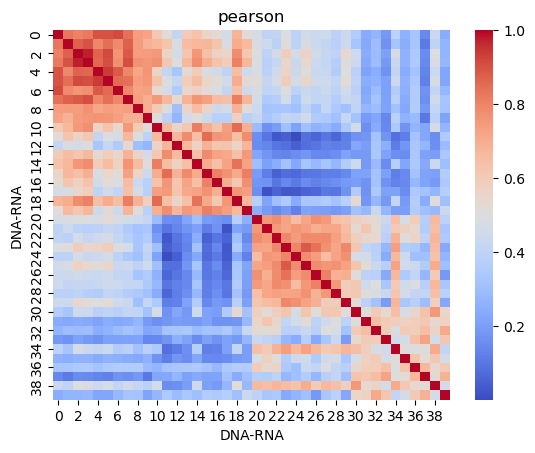

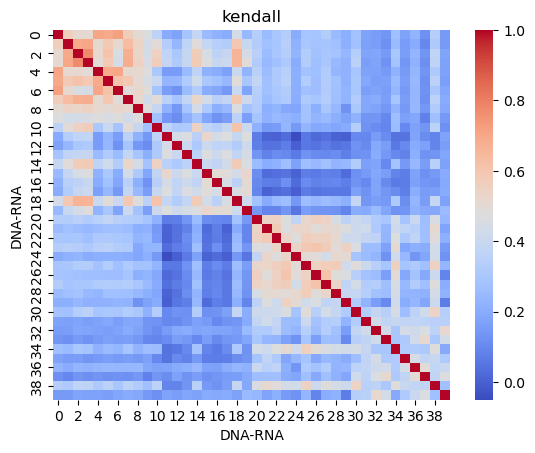

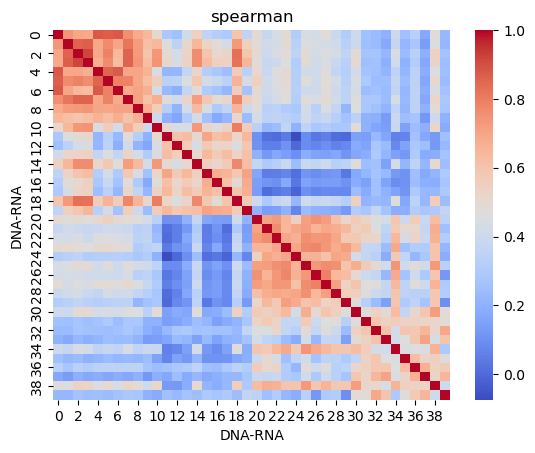

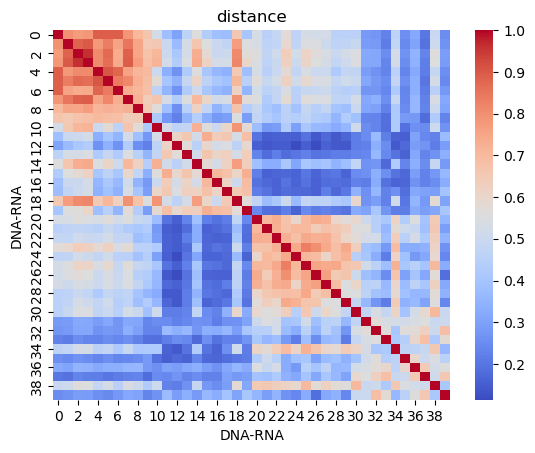

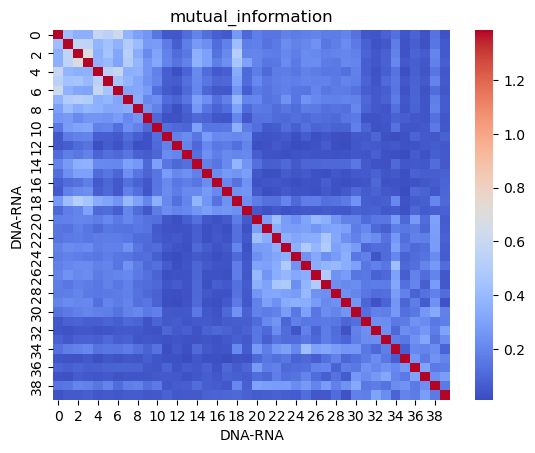

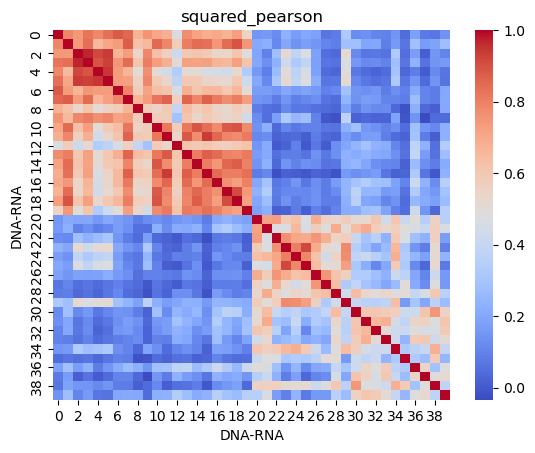

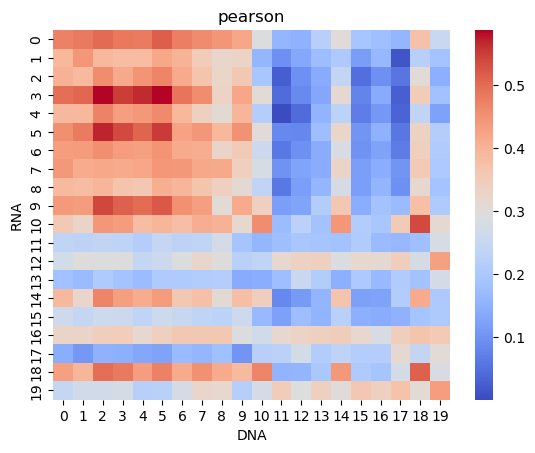

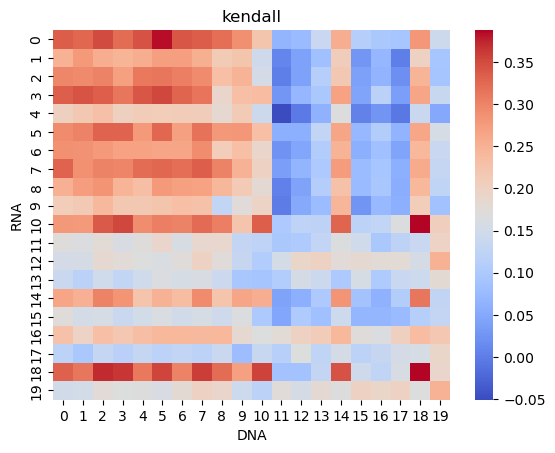

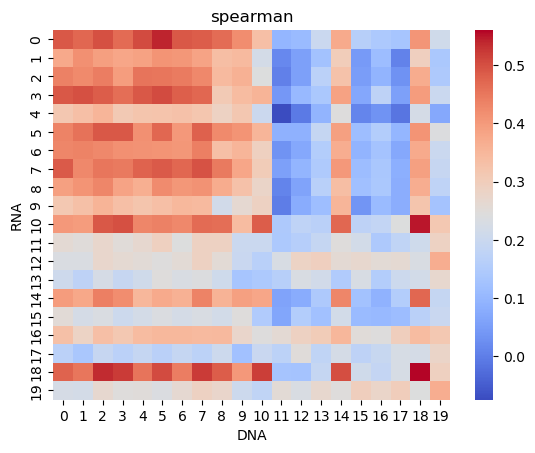

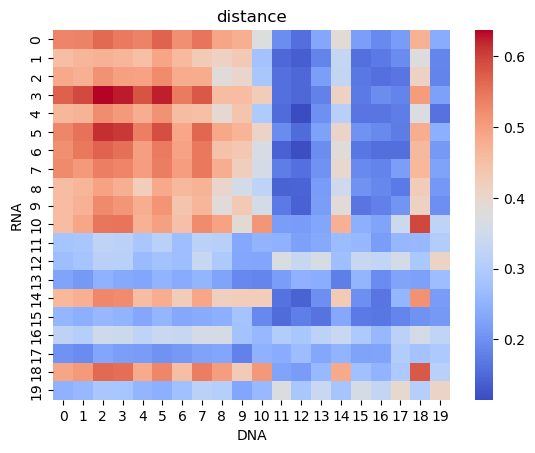

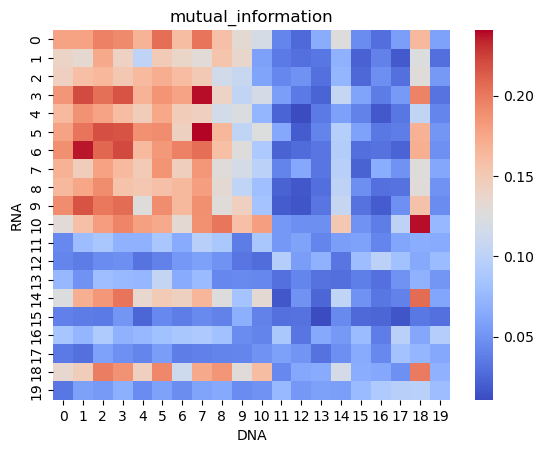

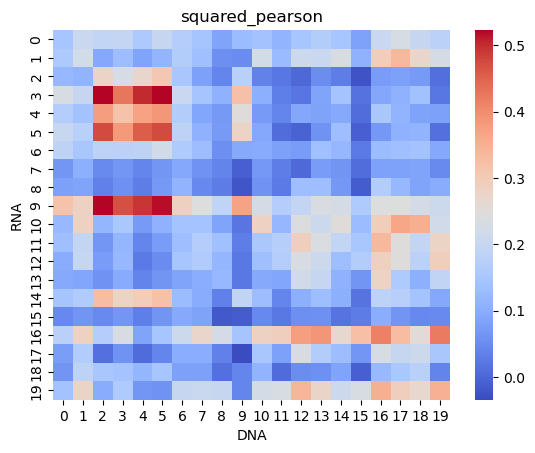

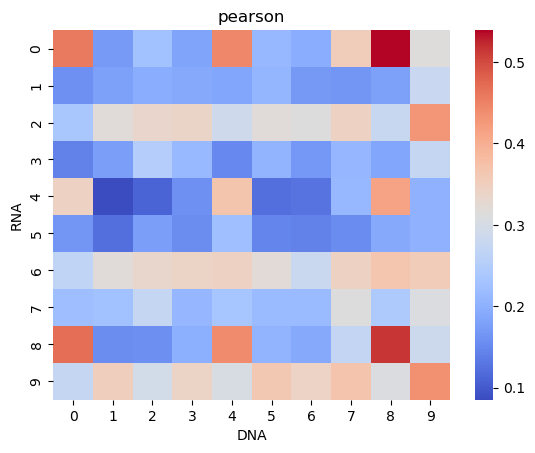

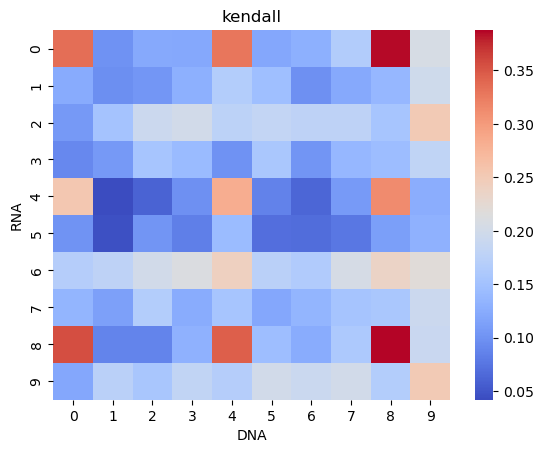

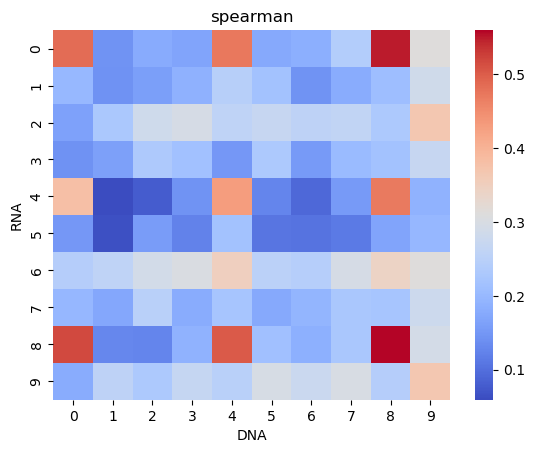

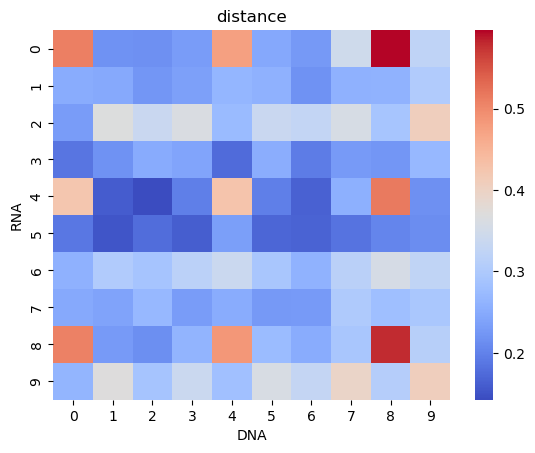

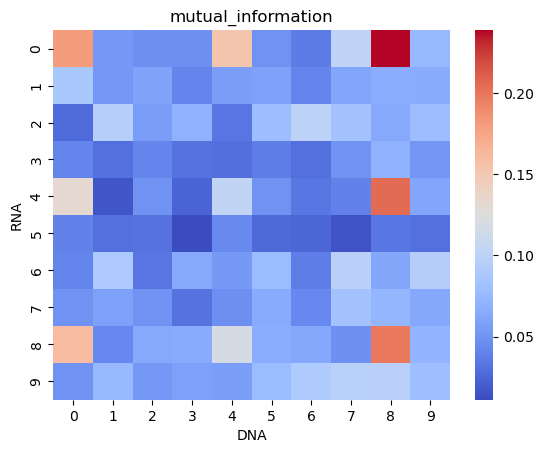

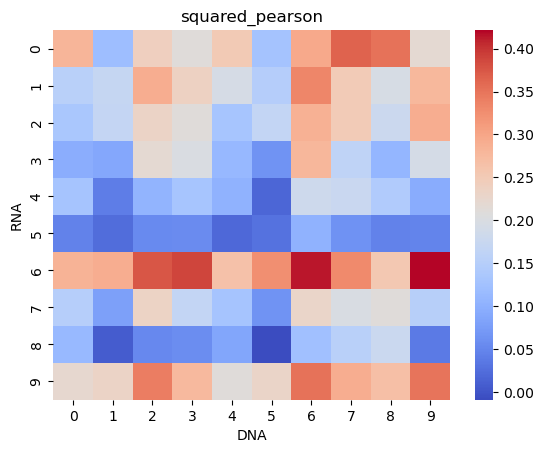

In [27]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, r], method) for c in range(40)] for r in range(40)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA-RNA')
    plt.ylabel('DNA-RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, 20+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, 10+c], sel_df.iloc[:, 30+r], method) for c in range(10)] for r in range(10)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)

In [28]:
sel_idx = set(np.where(np.array(pvalue_DNA)<0.005)[0]).union(set(np.where(np.array(pvalue_RNA)<0.005)[0]))
sel_df = larger_df.iloc[sorted(list(sel_idx)), :]
sel_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
8,-0.241184,-0.616917,-0.655136,-0.723747,-0.006932,-1.194451,0.055435,-0.981055,-0.279235,-1.123775,...,-0.147360,0.210963,-0.810250,-0.858327,0.180807,0.542348,0.102758,-0.197369,-0.256794,0.049180
16,-0.329183,0.000919,-0.741523,0.097634,-1.366524,-0.869600,-0.272007,0.173301,0.050401,-0.981342,...,0.642261,1.089069,0.338811,0.519062,0.430285,-0.286300,0.281045,-0.018758,0.986369,1.089221
180,-0.568546,-0.844556,-0.655244,-0.495141,-0.354240,-0.901403,-0.693983,-0.847889,-0.280853,-0.625140,...,-1.837875,-1.961932,-1.713196,-0.968058,-0.839094,-1.250177,-0.591984,-0.755204,-1.353901,-1.094183
196,-0.454607,-0.526614,-0.447830,-0.660675,-0.647209,-0.411348,-0.502624,-0.192769,-0.182777,-0.653576,...,0.127722,1.318628,0.468601,1.377760,1.181239,0.969829,1.742964,1.905853,1.291108,0.433386
197,-0.506342,-0.322632,-0.605285,-0.459229,-0.270239,-0.260249,-0.413549,-0.550530,-0.022277,-0.703054,...,0.127722,1.318628,0.468601,1.377760,1.181239,0.969829,1.742964,1.905853,1.291108,0.433386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,-0.786254,-1.791883,-0.027619,-0.101625,-0.793862,-0.468878,-0.802756,-0.134727,0.050235,-0.469608,...,0.268574,-1.694529,-0.767061,-1.275921,0.058463,-0.595420,-0.305650,-0.048365,-0.277688,-0.909326
2360,-1.375832,-1.985213,-0.317942,-0.316146,-0.858337,-1.100686,-1.246311,-0.085948,-0.164104,-0.159222,...,0.268574,-1.694529,-0.767061,-1.275921,0.058463,-0.595420,-0.305650,-0.048365,-0.277688,-0.909326
2459,0.220815,-0.409418,-0.641764,-0.602954,0.183317,-0.335339,0.453241,-0.136222,0.148232,0.288117,...,-1.413390,-1.472894,-1.492777,-0.319491,-0.696062,-1.127409,-0.186188,-1.091005,-0.901556,-0.342931
2536,-1.495946,-1.595137,-1.454522,-1.607988,-1.828246,-1.527233,-1.766750,-1.818434,-1.339972,-2.073249,...,-0.056193,-0.230439,0.583974,0.186234,1.092469,-0.152350,0.323554,0.324155,-0.645886,0.299283


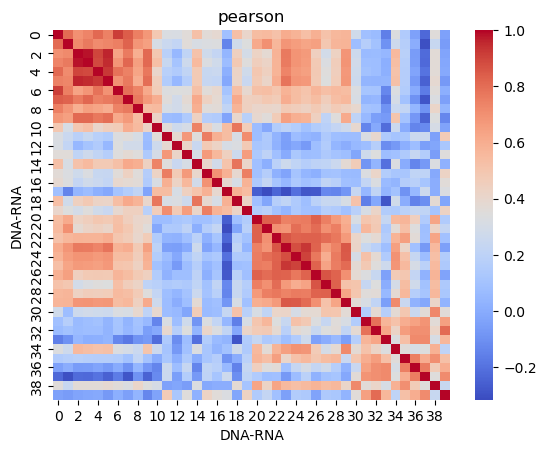

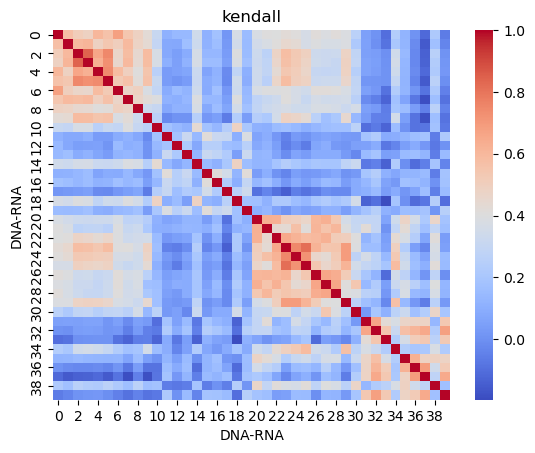

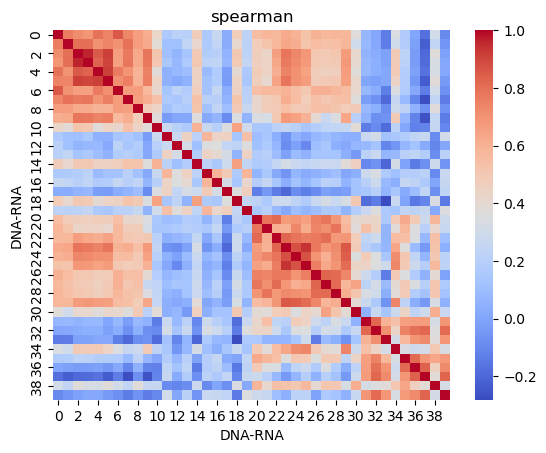

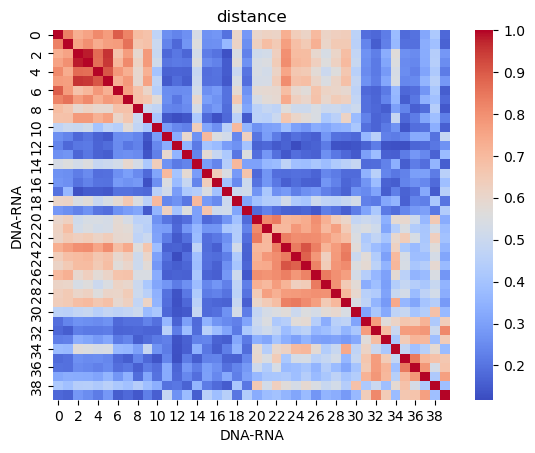

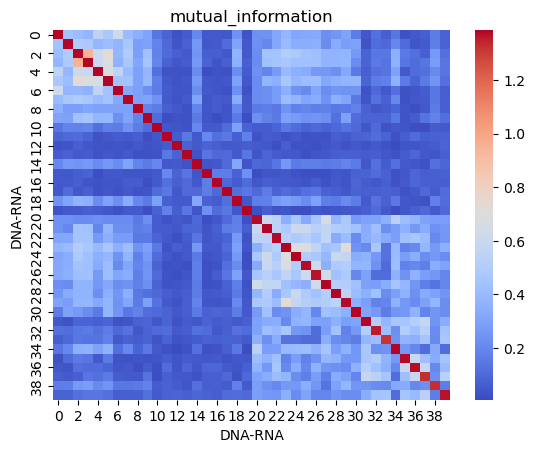

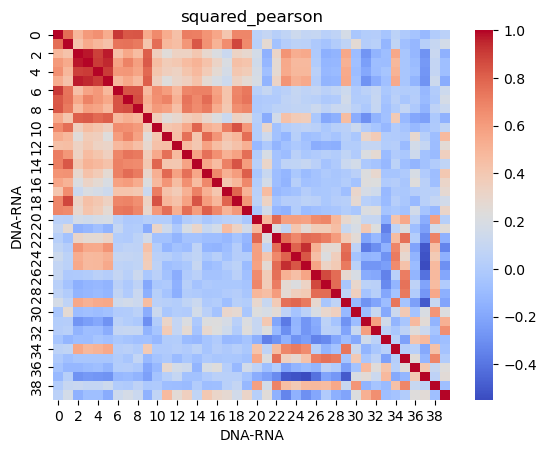

In [29]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, r], method) for c in range(40)] for r in range(40)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA-RNA')
    plt.ylabel('DNA-RNA')
    plt.title(method)

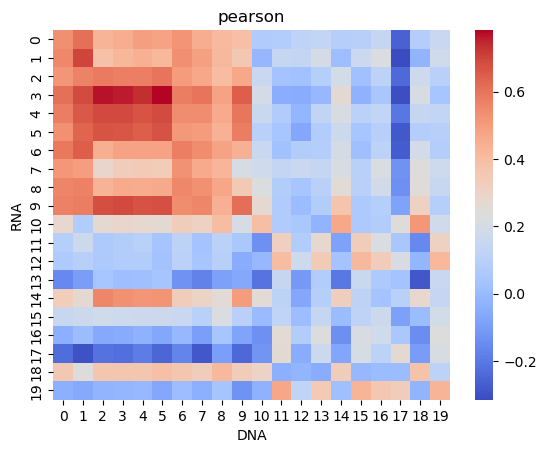

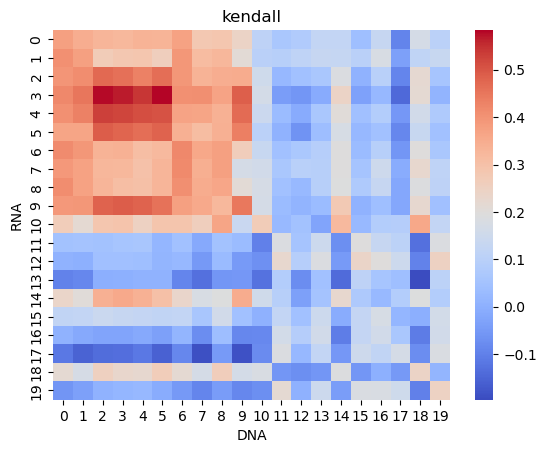

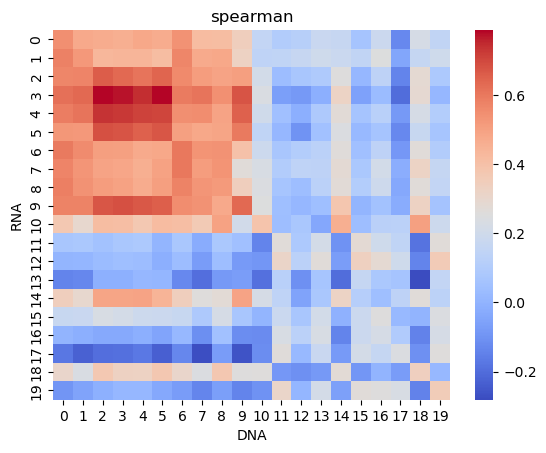

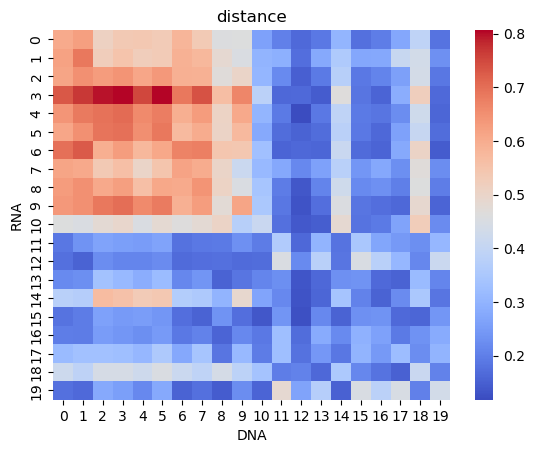

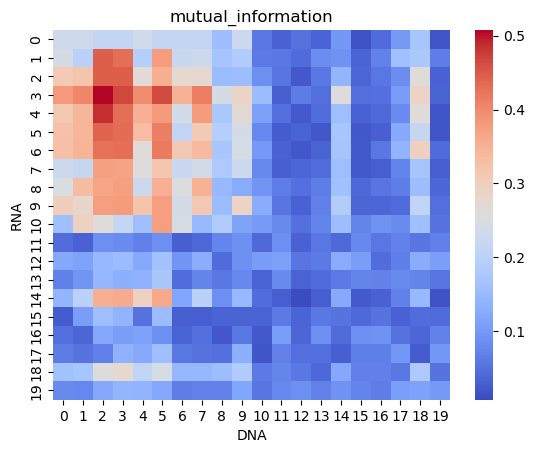

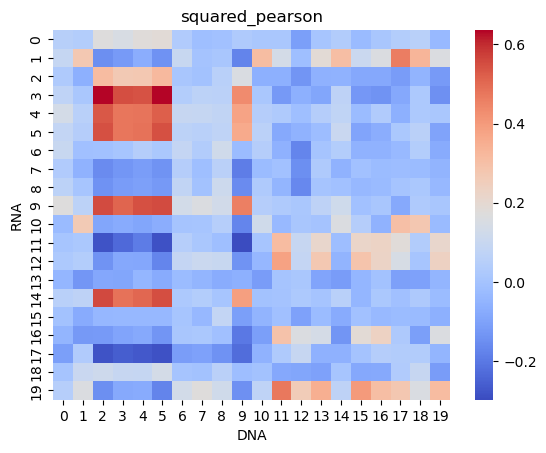

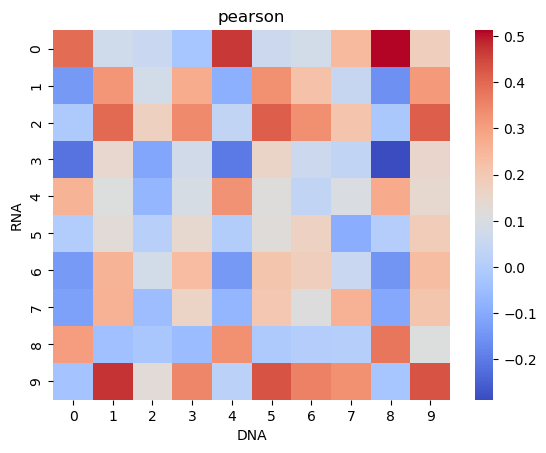

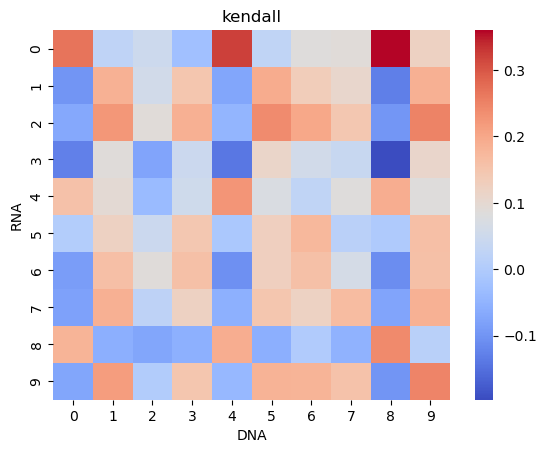

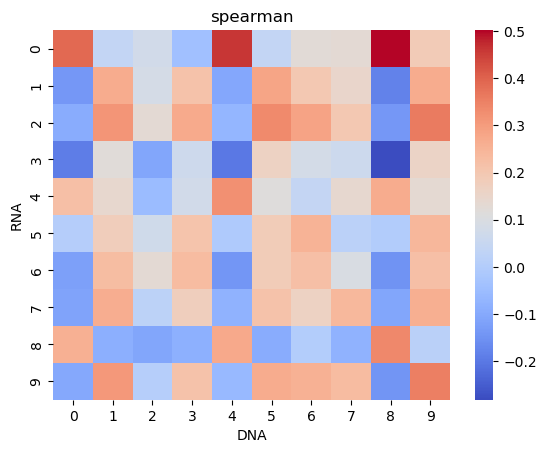

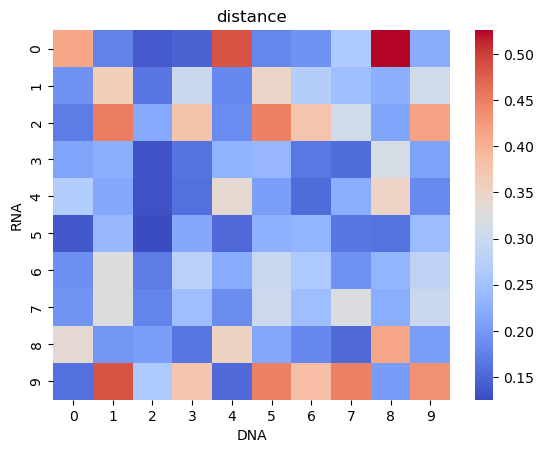

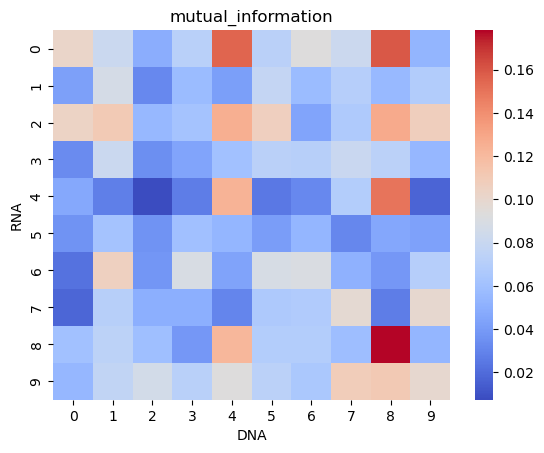

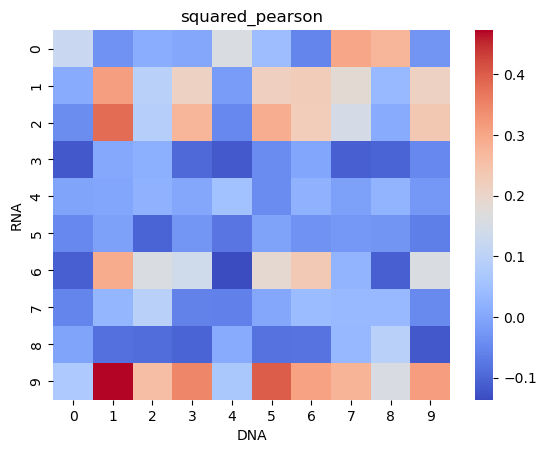

In [30]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, 20+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, 10+c], sel_df.iloc[:, 30+r], method) for c in range(10)] for r in range(10)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)

In [31]:
sortedPlis = geneloc.iloc[np.where(geneloc.iloc[:, 5] < 0.01)[0], 5]
sorted_idx = []

for sorted_p in sortedPlis:
    flag = True
    idx_temp = np.where(geneloc.iloc[:, 5] == sorted_p)[0][0]
    if idx_temp in indexLis:
        sorted_idx.append(idx_temp)
np.array(sorted(list(sorted_idx))[1:]) - np.array(sorted(list(sorted_idx))[:-1])

array([  1,  12, 180,   5,   5,   4,   6,  10,   4,   2, 216,   9, 113,
        25,  27,   7,   1,   9,   7, 101,  15,   9,  16,   4,   9,   1,
         7,   3,   7,   3,   9,   3,   3,   3,   8,   5,   3,   4,   5,
         7,   2,   5,   7,   4,   8,   1,   7,   7,   3,   5,   5,   4,
         7,   6,  10,   2,  32, 116,   6,  10,  15, 253,   2,  49,   5,
        11,  37,  49,  83,  36,  32,  34,  50,  83,   5,   5,   6,   1,
         6,  37,  25,  49, 110,  27,  58,   5,  25,   8,  16,   9,  87,
         3,   7,   6,   3,   5,  59,   8,   9,  46,  20,  34])

In [32]:
sel_df = larger_df.iloc[sorted(list(sorted_idx)), :]
sel_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
3,-0.556754,0.364386,0.055008,0.402234,-0.640741,-0.373093,-1.322705,0.060720,0.868651,0.417876,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
4,-0.691309,0.586985,0.152294,0.173904,-0.722721,-0.617268,-1.262956,-0.600793,0.599769,-0.876249,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
16,-0.329183,0.000919,-0.741523,0.097634,-1.366524,-0.869600,-0.272007,0.173301,0.050401,-0.981342,...,0.642261,1.089069,0.338811,0.519062,0.430285,-0.286300,0.281045,-0.018758,0.986369,1.089221
196,-0.454607,-0.526614,-0.447830,-0.660675,-0.647209,-0.411348,-0.502624,-0.192769,-0.182777,-0.653576,...,0.127722,1.318628,0.468601,1.377760,1.181239,0.969829,1.742964,1.905853,1.291108,0.433386
201,0.035960,0.067235,-0.006069,0.366017,0.547505,0.012029,-0.151188,0.317204,0.190441,0.362779,...,0.127722,1.318628,0.468601,1.377760,1.181239,0.969829,1.742964,1.905853,1.291108,0.433386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,-0.506942,-1.361242,-0.773146,-0.776013,-0.753905,-0.502376,-0.786956,-0.907981,-0.565656,-0.059061,...,-0.627541,-0.000030,-0.465782,0.520680,-0.184916,0.790859,0.203462,-0.576574,-1.348278,-0.139863
2436,0.376584,-0.737722,-0.657403,-0.733205,0.412550,0.455283,0.575923,-0.577284,-0.018774,0.466496,...,-0.627541,-0.000030,-0.465782,0.520680,-0.184916,0.790859,0.203462,-0.576574,-1.348278,-0.139863
2482,-1.912007,-2.110628,-1.834143,-1.828852,-2.203616,-1.758255,-2.247890,-2.102244,-0.639242,-2.542321,...,-0.459233,0.237501,-0.349875,-0.417888,0.149695,-0.965827,-1.388553,-0.805806,-0.643841,-0.478559
2502,-1.933425,-2.041294,-2.274359,-2.231170,-2.541958,-2.096517,-1.984493,-2.160581,-1.459538,-2.393516,...,-0.459233,0.237501,-0.349875,-0.417888,0.149695,-0.965827,-1.388553,-0.805806,-0.643841,-0.478559


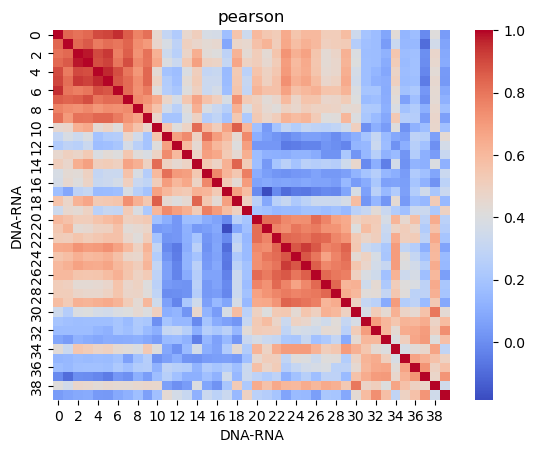

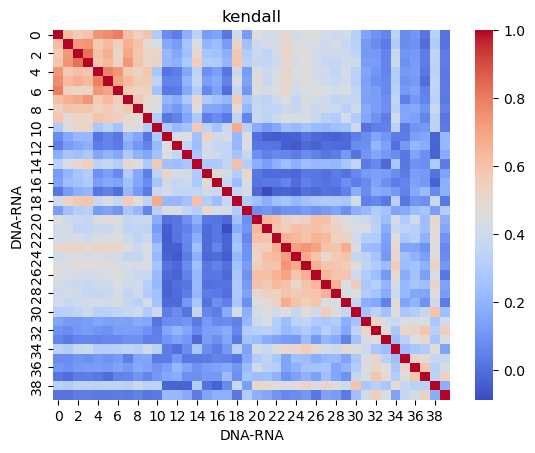

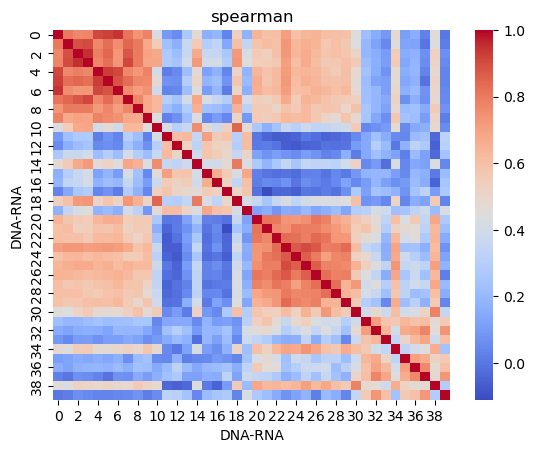

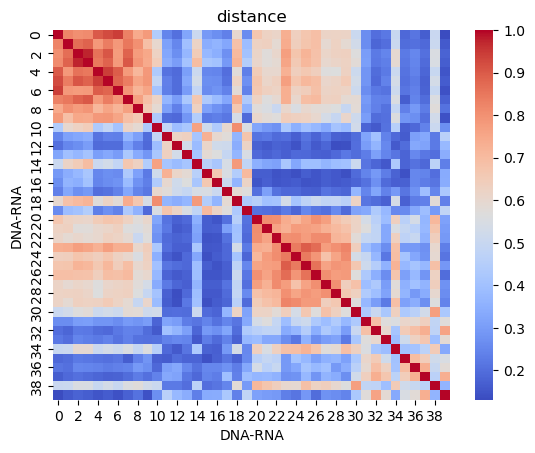

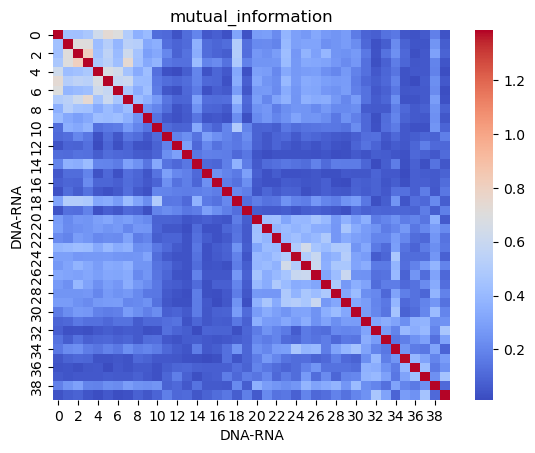

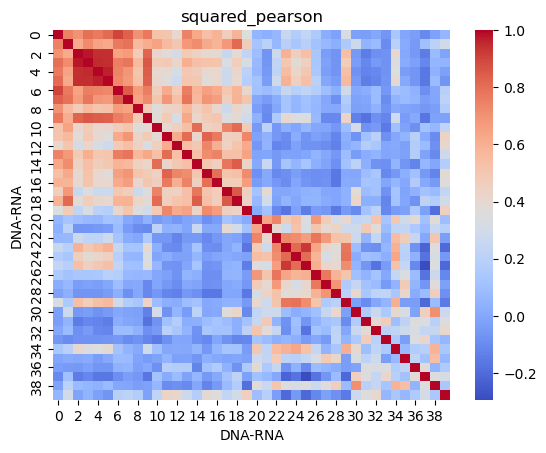

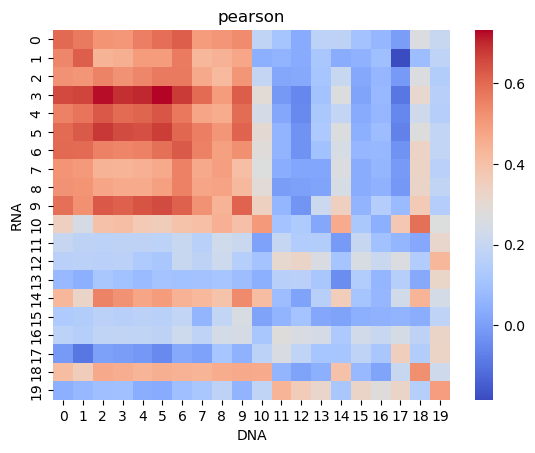

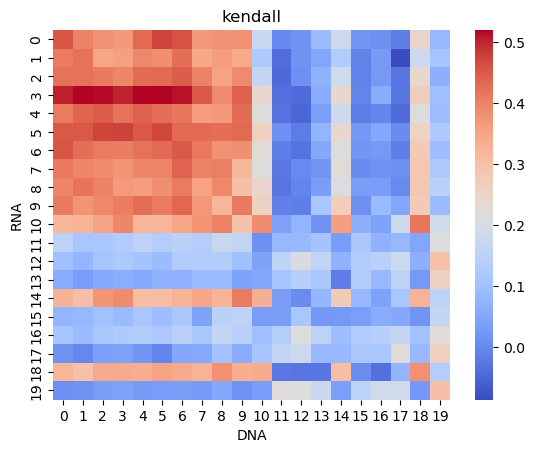

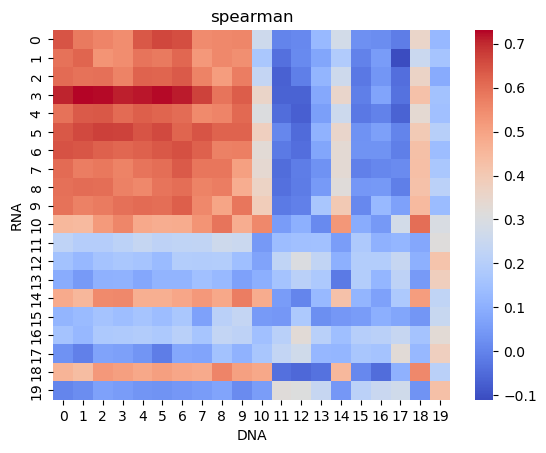

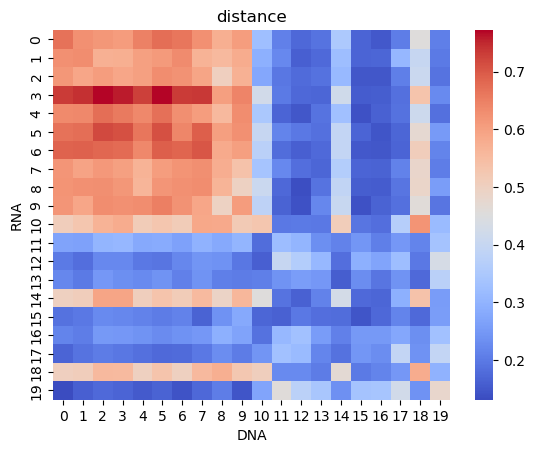

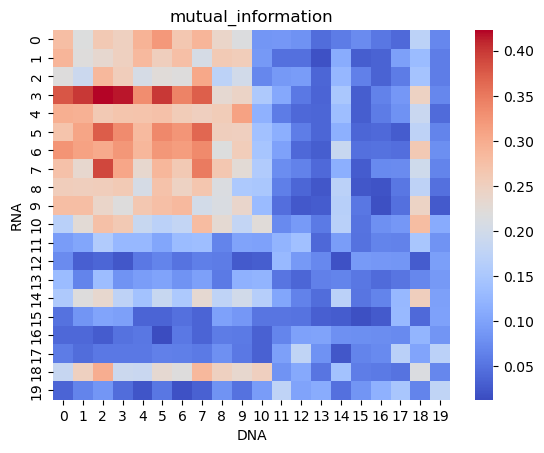

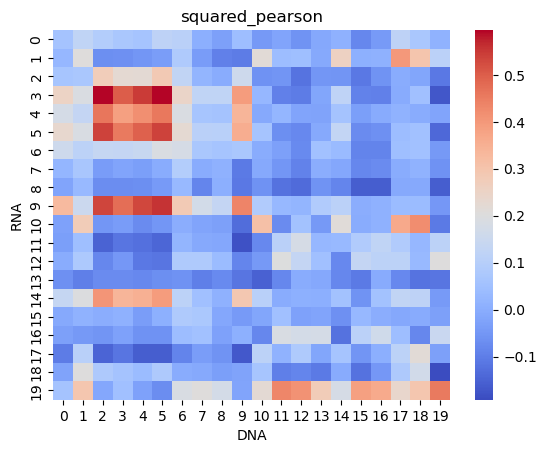

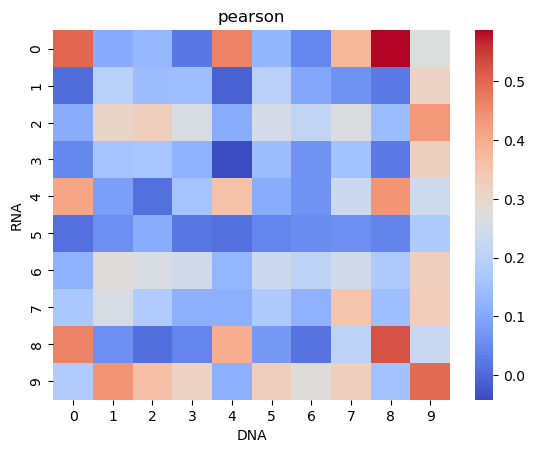

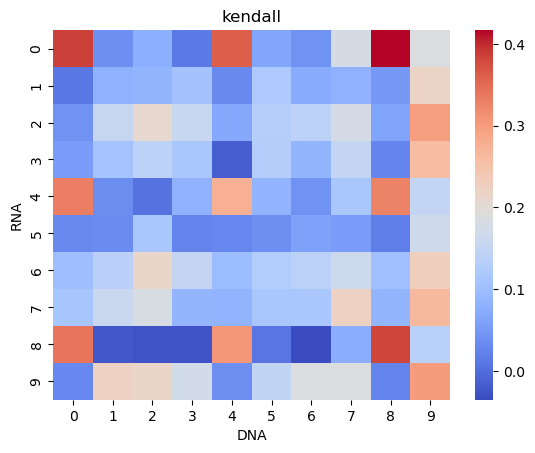

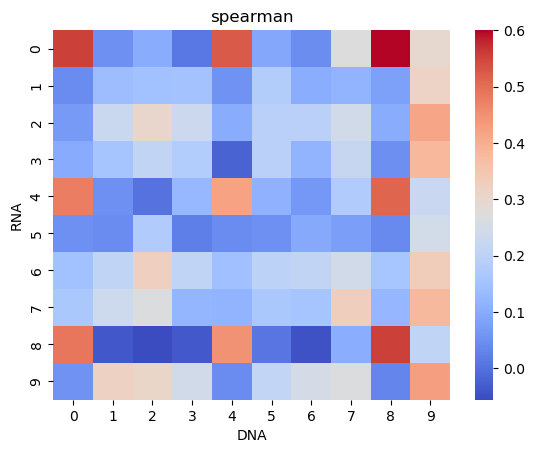

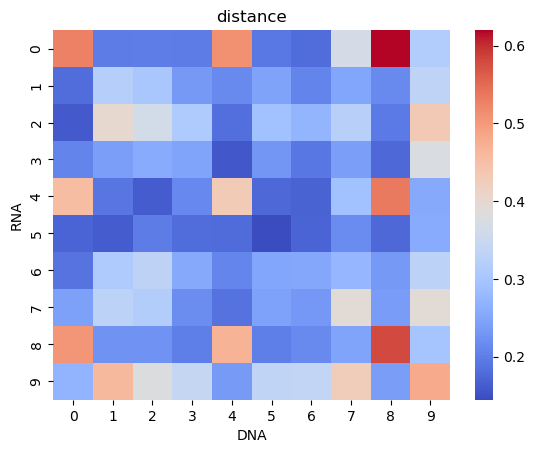

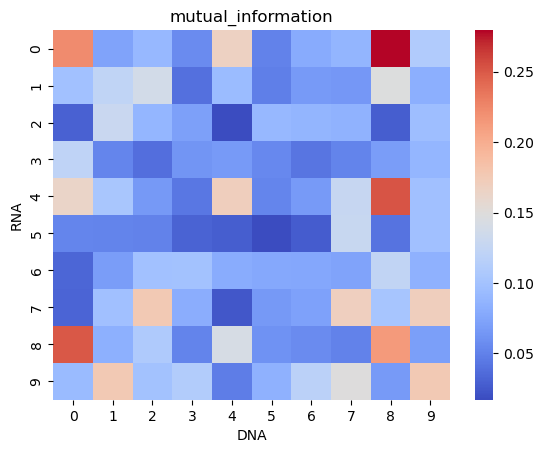

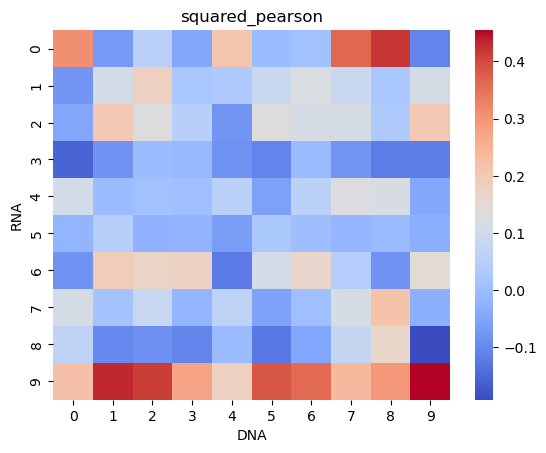

In [33]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, r], method) for c in range(40)] for r in range(40)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA-RNA')
    plt.ylabel('DNA-RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, 20+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, 10+c], sel_df.iloc[:, 30+r], method) for c in range(10)] for r in range(10)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)

In [34]:
sortedPlis = geneloc.iloc[np.where(geneloc.iloc[:, 5] < 0.1)[0], 5]
sorted_idx = []

for sorted_p in sortedPlis:
    flag = True
    idx_temp = np.where(geneloc.iloc[:, 5] == sorted_p)[0][0]
    if idx_temp in indexLis:
        sorted_idx.append(idx_temp)
np.array(sorted(list(sorted_idx))[1:]) - np.array(sorted(list(sorted_idx))[:-1])

array([ 1,  8,  4,  3, 13,  7, 17, 45, 20,  1,  6, 14, 28,  4,  6,  8,  8,
        5,  5,  4,  6,  5,  5,  4,  2, 12, 32,  2, 58,  6, 32, 14,  2, 34,
       12,  3,  9,  4,  5,  3,  7,  3, 63, 12,  9, 16,  6, 14,  5,  1, 15,
       11,  7,  1,  9,  2,  5,  6,  6, 25, 11, 12,  5, 23,  5,  4,  4,  6,
        4,  5,  9,  1,  8,  4,  3,  4,  9,  1,  7,  3,  7,  3,  9,  3,  3,
        3,  8,  5,  3,  4,  5,  7,  2,  5,  7,  4,  8,  1,  7,  7,  3,  5,
        5,  4,  7,  6,  3,  7,  2, 16, 16,  6,  1, 41, 24, 17, 11,  4,  4,
        5,  3,  6,  3,  7,  3,  9,  3,  3,  7,  3, 17, 10,  7, 14,  3, 13,
       10,  9,  6,  9,  3,  6, 20,  4, 14, 50,  9, 31,  5,  2, 15, 26,  8,
        5, 11,  2,  6,  5, 11,  2,  8,  2,  1,  9, 32,  8,  9,  7, 17,  3,
        5, 16,  4, 11, 11,  5,  5,  5,  3,  8,  3,  7,  4,  7, 21,  4,  5,
       19,  6,  5, 16,  8, 14,  1,  6,  6,  5,  5, 12,  2,  7,  3, 10, 18,
        7,  8,  5,  5,  6,  1,  6,  6,  5,  7,  2,  6,  3,  8,  2,  8,  2,
        5,  8, 33, 12,  4

In [35]:
sel_df = larger_df.iloc[sorted(list(sorted_idx)), :]
sel_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9
3,-0.556754,0.364386,0.055008,0.402234,-0.640741,-0.373093,-1.322705,0.060720,0.868651,0.417876,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
4,-0.691309,0.586985,0.152294,0.173904,-0.722721,-0.617268,-1.262956,-0.600793,0.599769,-0.876249,...,-0.150142,0.092168,-0.754330,-0.495450,0.547841,1.176191,0.221608,0.229202,-0.383708,-0.162728
12,-0.996066,-0.300510,-0.074123,0.194919,-0.875536,-0.681466,-0.683117,-0.170625,0.140527,-0.484334,...,-0.143188,0.389155,-0.894130,-1.402643,-0.369746,-0.408418,-0.075516,-0.837225,-0.066423,0.367042
16,-0.329183,0.000919,-0.741523,0.097634,-1.366524,-0.869600,-0.272007,0.173301,0.050401,-0.981342,...,0.642261,1.089069,0.338811,0.519062,0.430285,-0.286300,0.281045,-0.018758,0.986369,1.089221
19,-0.477199,-0.992174,-0.331871,-0.309783,0.147208,-0.160867,-0.817738,0.118006,0.361723,-0.827422,...,0.642261,1.089069,0.338811,0.519062,0.430285,-0.286300,0.281045,-0.018758,0.986369,1.089221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,-1.094596,-1.165538,-1.257022,-1.261671,-1.074056,-1.245776,-0.801555,-1.425384,-0.731966,0.639721,...,-1.197287,-0.279617,0.050823,-0.573091,0.509336,-0.743793,-0.534238,-1.009423,-0.943136,0.303468
2536,-1.495946,-1.595137,-1.454522,-1.607988,-1.828246,-1.527233,-1.766750,-1.818434,-1.339972,-2.073249,...,-0.056193,-0.230439,0.583974,0.186234,1.092469,-0.152350,0.323554,0.324155,-0.645886,0.299283
2548,-1.690715,-1.365321,-1.300084,-1.274928,-1.133429,-1.619104,-1.413877,-1.644431,-0.842355,-2.541469,...,-0.554779,-0.477076,0.630811,-0.586757,-0.199813,0.277960,-0.736750,0.079171,-0.227220,-0.620576
2608,-1.552267,-1.331644,-1.372947,-1.324081,-1.680654,-1.506519,-1.630455,-1.304220,-2.016058,-1.760236,...,0.479724,0.503332,1.346640,0.447045,0.369367,-0.253740,-1.005932,0.392297,-0.113972,-0.065131


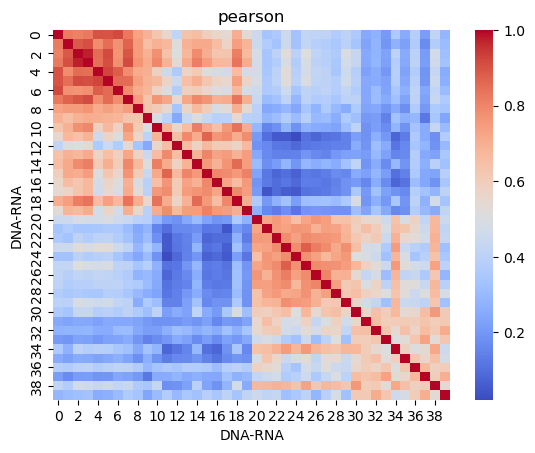

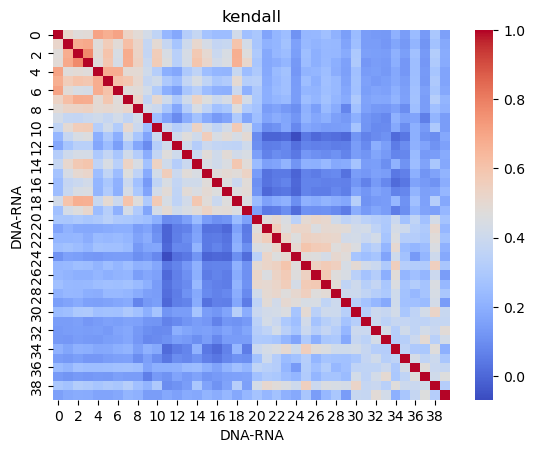

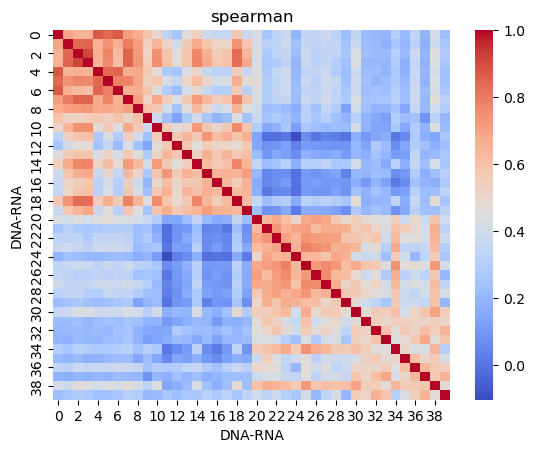

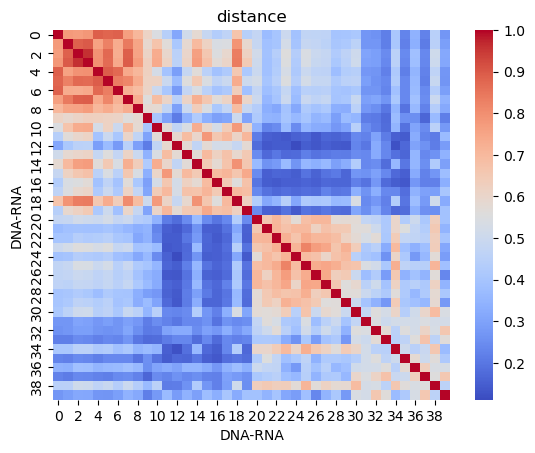

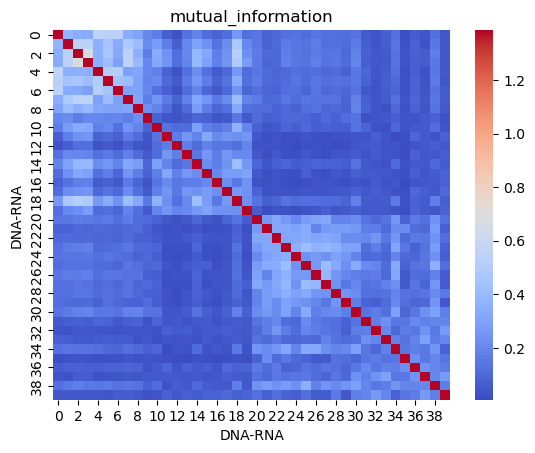

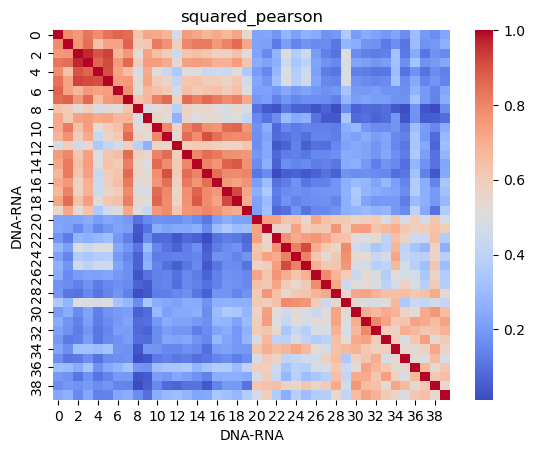

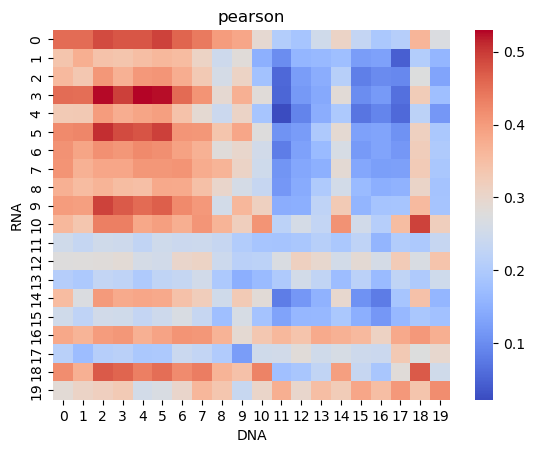

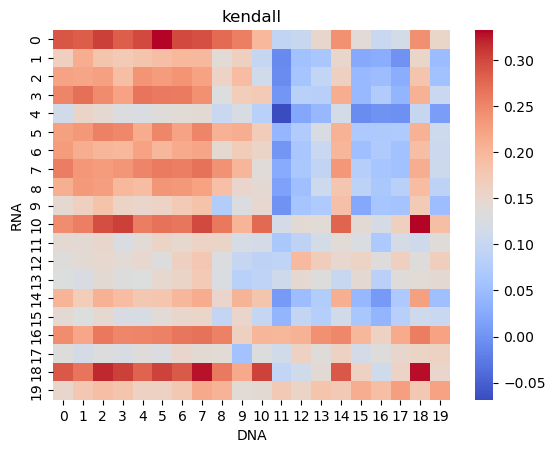

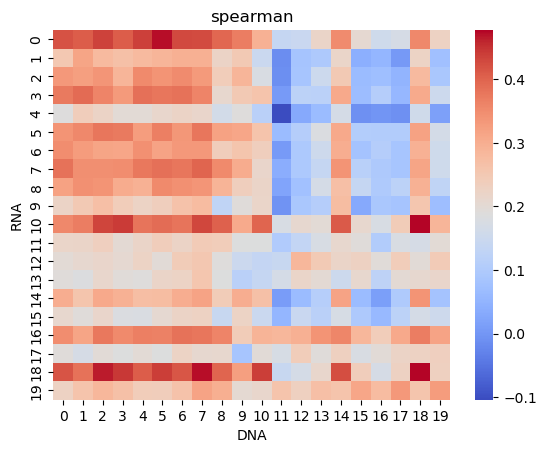

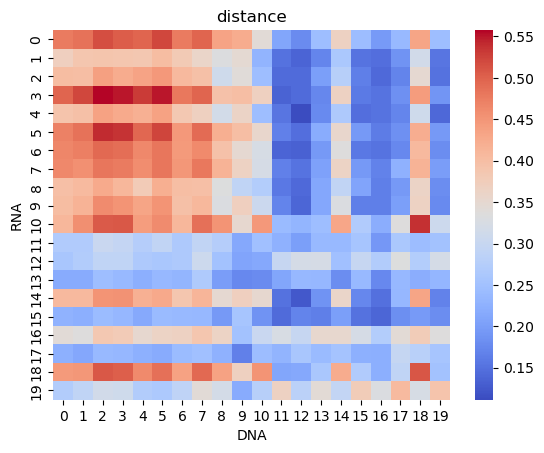

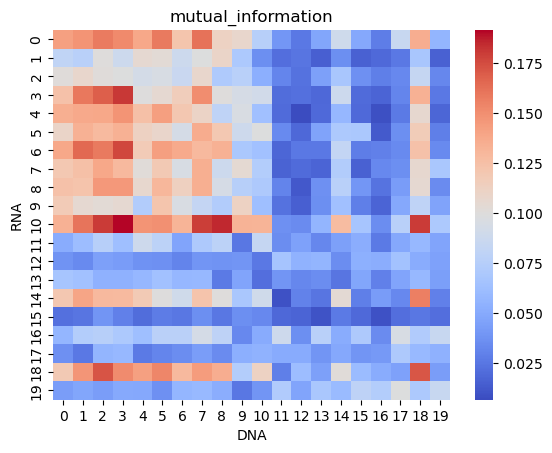

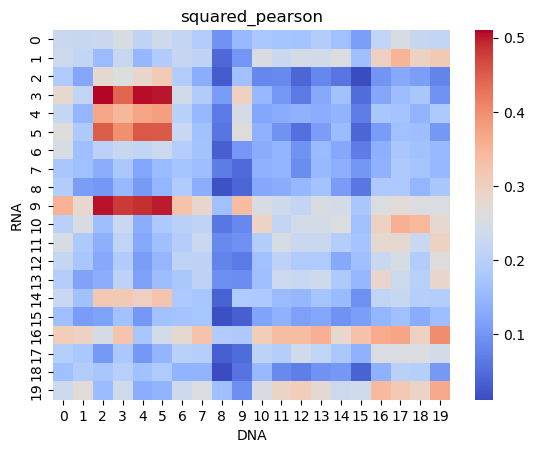

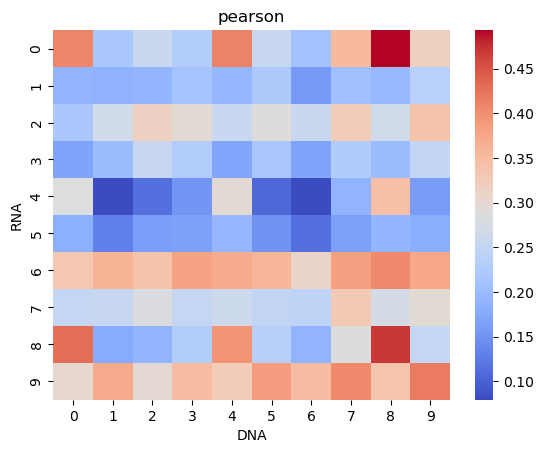

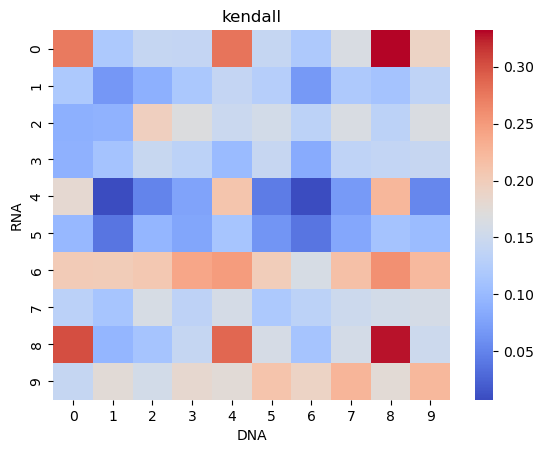

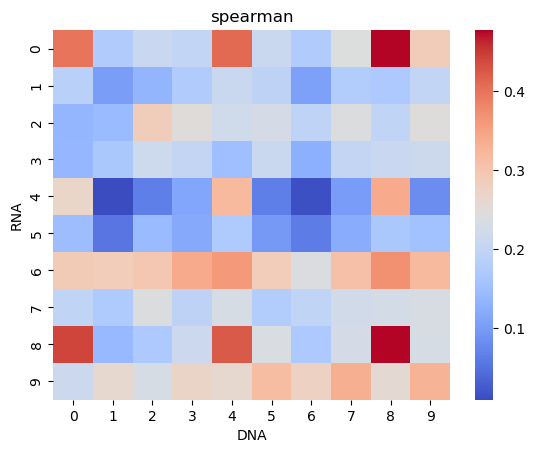

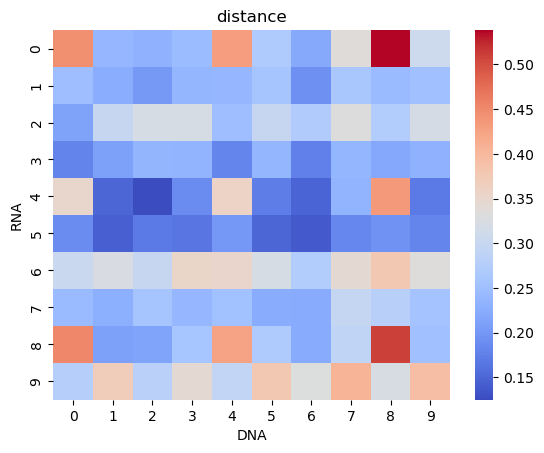

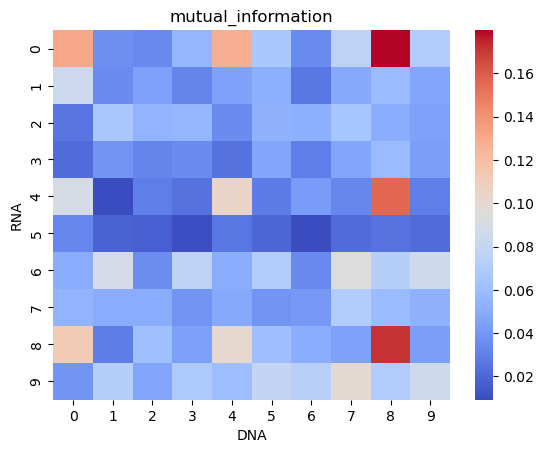

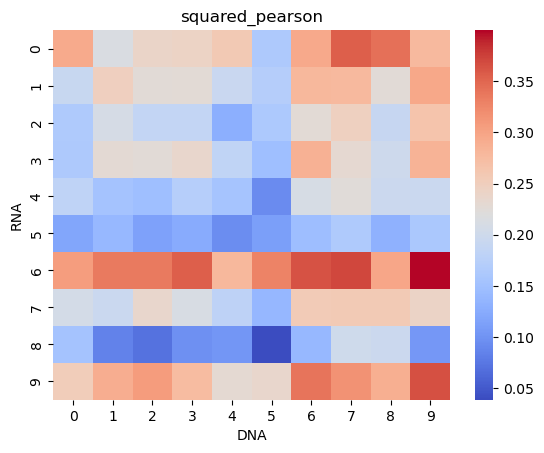

In [36]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, r], method) for c in range(40)] for r in range(40)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA-RNA')
    plt.ylabel('DNA-RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, c], sel_df.iloc[:, 20+r], method) for c in range(20)] for r in range(20)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    DR_distance= np.array([[cross_correlation(sel_df.iloc[:, 10+c], sel_df.iloc[:, 30+r], method) for c in range(10)] for r in range(10)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(DR_distance, cmap = 'coolwarm', ax = ax)
    plt.xlabel('DNA')
    plt.ylabel('RNA')
    plt.title(method)